# <center> Data overview

In [80]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Load&preprocess data

Данные были выгружены в `parquet` для удобства дальнейшей работы.

In [2]:
names = ['ETHUSDT||Binance.london',
 'ETHUSDT||BinanceSwap.london',
 'ETH-USD||GDAX.london',
 'BTC-USD||GDAX.london',
 'BTCUSDT||Binance.london',
 'BTCUSDT||BinanceSwap.london',
 'BTCUSDT||Huobi.london',
 'ADAUSDT||Huobi.london',
 'ADAUSDT||Binance.london',
 'ADAUSDT||BinanceSwap.london',
 'SHIBUSDT||Binance.london',
 'ATOMUSDT||Binance.london',
 'SOLUSDT||Binance.london',
 'BNBUSDT||Binance.london',
 'XRPUSDT||Binance.london',
 'XRPUSDT||BinanceSwap.london',
 'XRPBTC||Binance.london',
 'LINKUSDT||Huobi.london',
 'LINKUSDT||Binance.london',
 'TRXUSDT||Binance.london']

In [3]:
data = pd.read_parquet('data1.parquet')

In [4]:
data.columns = names

In [5]:
data.index= pd.to_datetime(data.index)

In [6]:
data.head()

,ETHUSDT||Binance.london,ETHUSDT||BinanceSwap.london,ETH-USD||GDAX.london,BTC-USD||GDAX.london,BTCUSDT||Binance.london,BTCUSDT||BinanceSwap.london,BTCUSDT||Huobi.london,ADAUSDT||Huobi.london,ADAUSDT||Binance.london,ADAUSDT||BinanceSwap.london,SHIBUSDT||Binance.london,ATOMUSDT||Binance.london,SOLUSDT||Binance.london,BNBUSDT||Binance.london,XRPUSDT||Binance.london,XRPUSDT||BinanceSwap.london,XRPBTC||Binance.london,LINKUSDT||Huobi.london,LINKUSDT||Binance.london,TRXUSDT||Binance.london
time,,,,,,,,,,,,,,,,,,,,
2021-10-22 00:00:00.178675,4053.014940,4057.255000,4053.730816,62197.642428,62191.750545,62260.15365,62201.995,2.136342,2.1365,2.137600,0.000027,34.330,190.452185,470.85,1.088550,1.08935,0.000017,28.265900,28.265,0.099593
2021-10-22 00:00:00.203844,4053.009396,4057.255000,4053.800589,62197.001760,62191.065245,62259.09415,62201.995,2.136342,2.1365,2.137604,0.000027,34.330,190.452095,470.85,1.088503,1.08935,0.000017,28.265900,28.265,0.099575
2021-10-22 00:00:00.242200,4052.936613,4057.167850,4053.799773,62199.860972,62191.065245,62258.84575,62201.995,2.136277,2.1365,2.137600,0.000027,34.330,190.452095,470.85,1.088503,1.08935,0.000017,28.267050,28.265,0.099586
2021-10-22 00:00:00.325625,4052.995000,4057.170125,4053.747344,62198.990994,62191.065245,62258.58220,62201.995,2.136277,2.1365,2.137600,0.000027,34.330,190.451735,470.85,1.088503,1.08935,0.000017,28.267050,28.265,0.099578
2021-10-22 00:00:00.454115,4052.995000,4057.170125,4053.702866,62199.106867,62187.824398,62258.58220,62201.995,2.136234,2.1365,2.137600,0.000027,34.335,190.453520,470.85,1.088503,1.08935,0.000017,28.266219,28.265,0.099570


In [7]:
'Shape: ',  data.shape

('Shape: ', (2344759, 20))

## Price&volatility

Графики изменения цены по каждому из инструментов выглядят следующим образом.

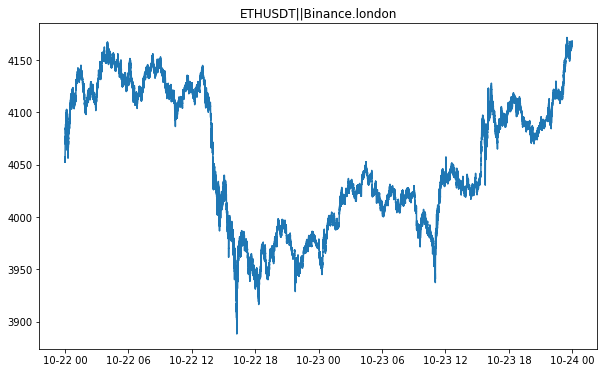

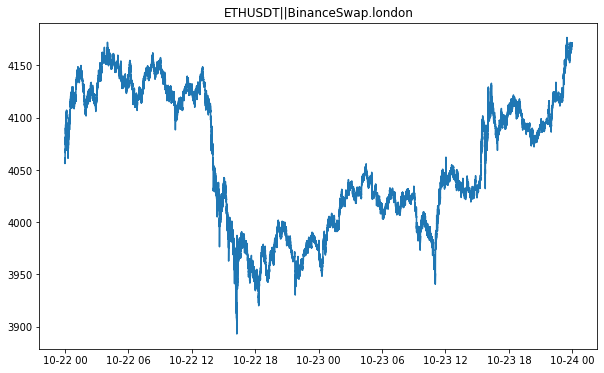

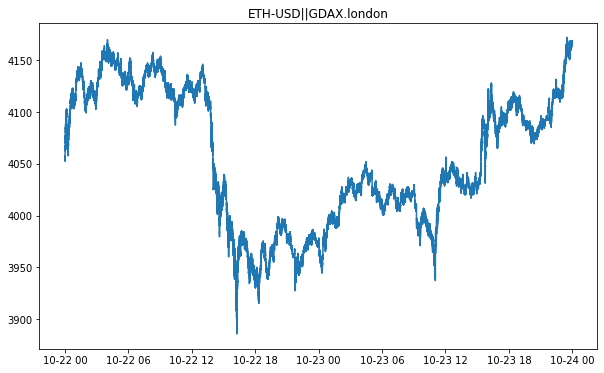

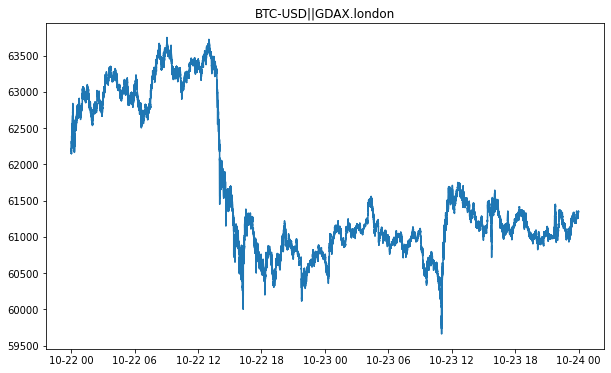

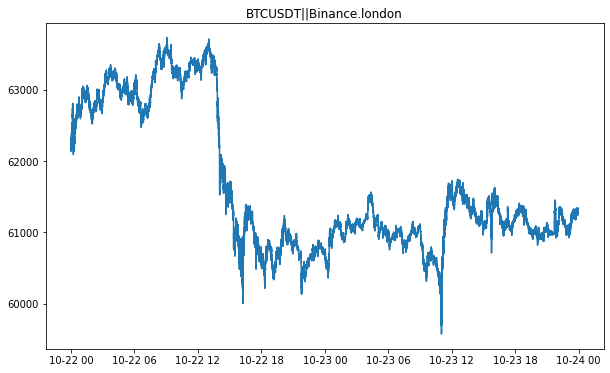

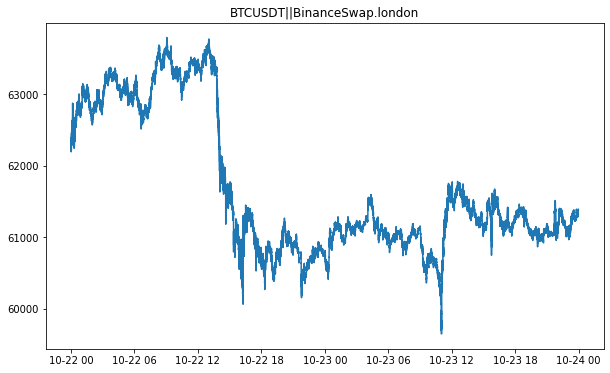

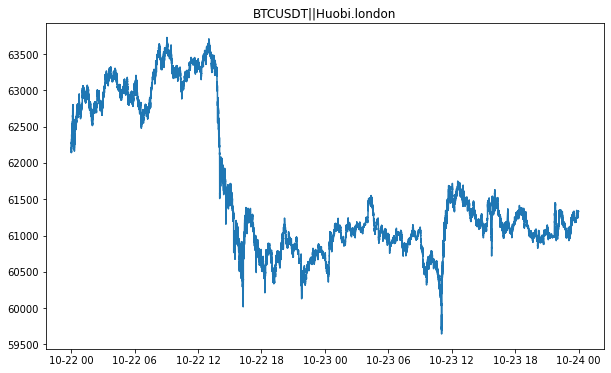

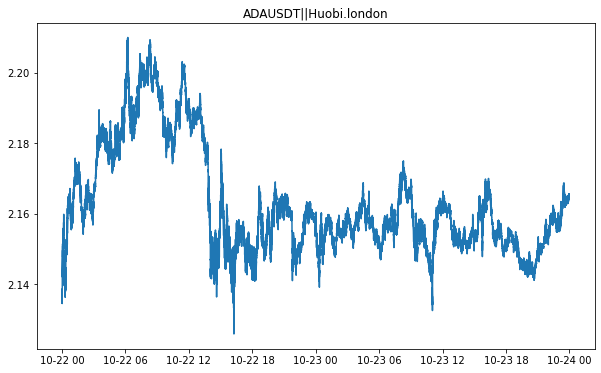

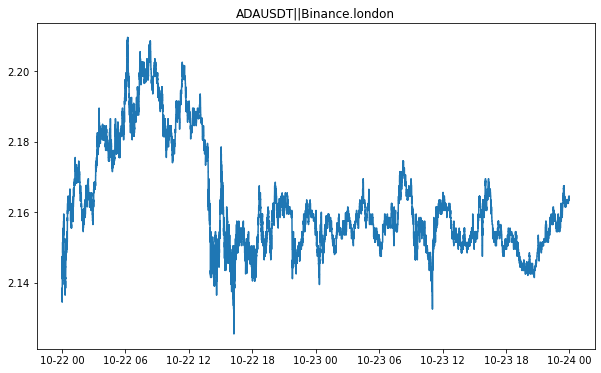

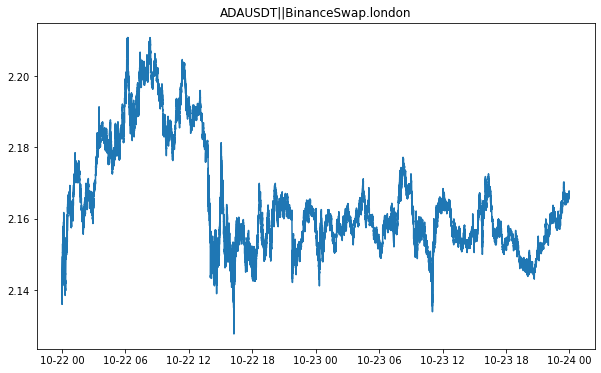

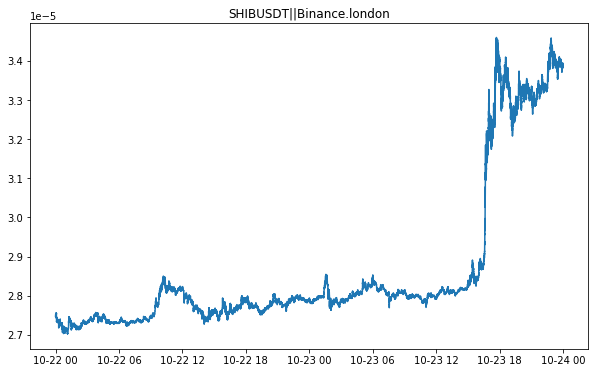

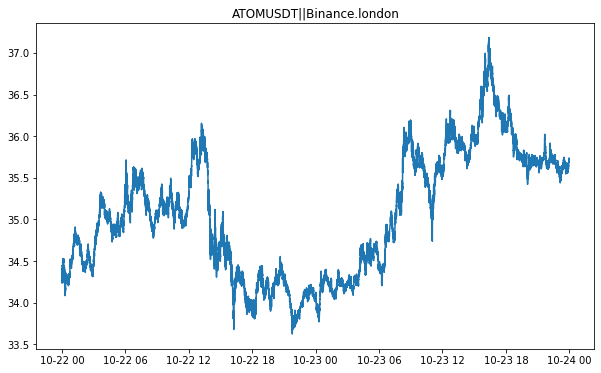

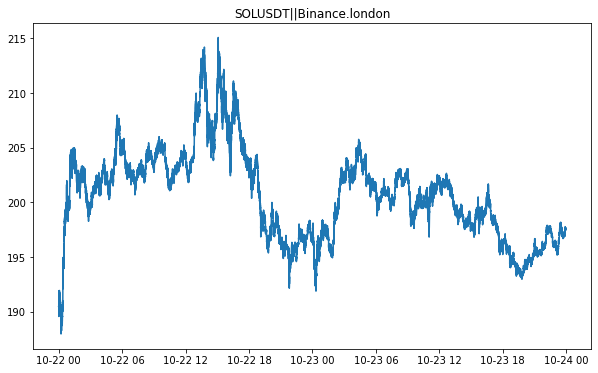

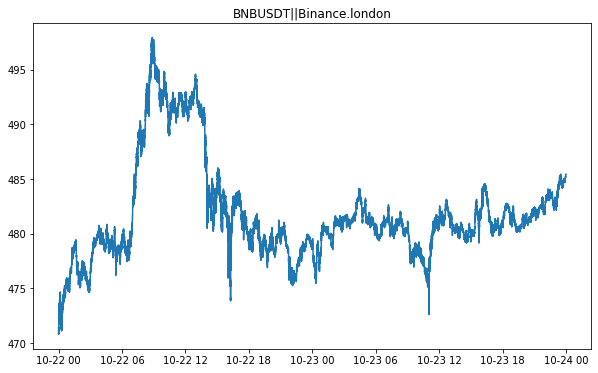

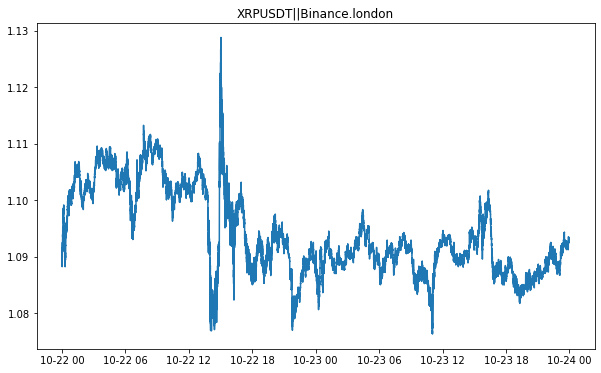

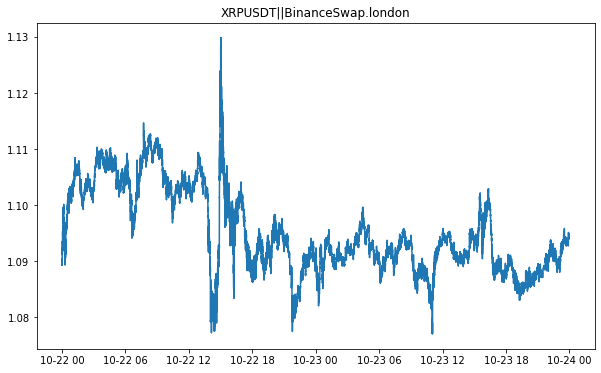

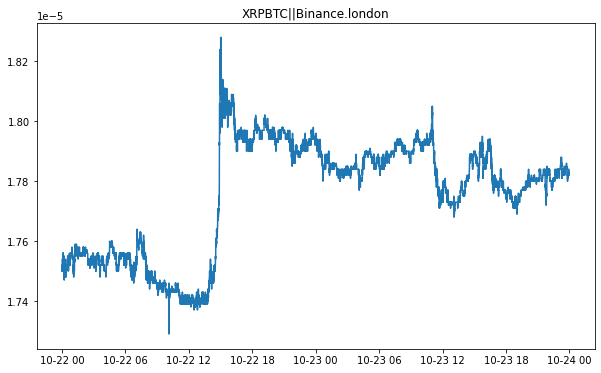

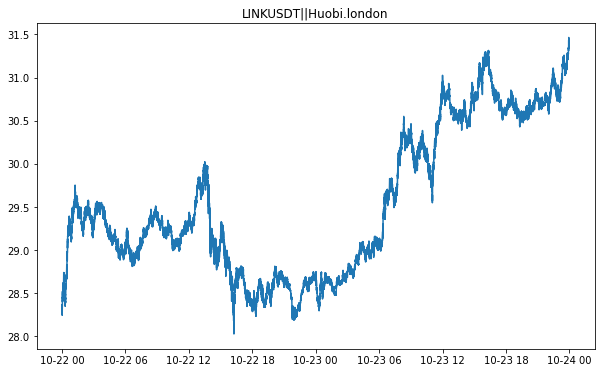

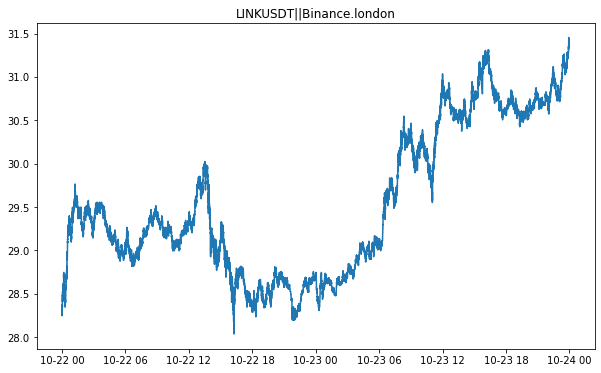

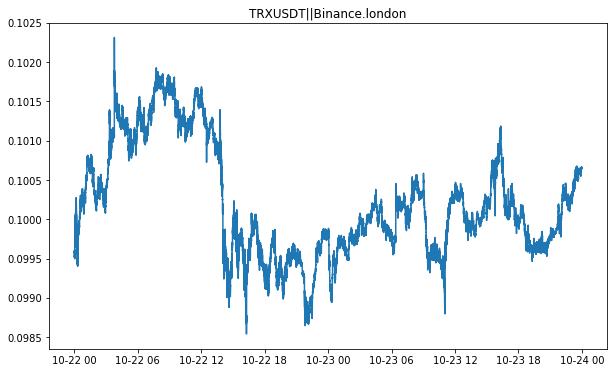

In [8]:
for col in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data[col])
    plt.title(col)
    plt.show()

Данные достаточно высокочастотные, больше 10 апдейтов в секунду. На графике ниже представлено среднее время между апдейтами в милисекундах:

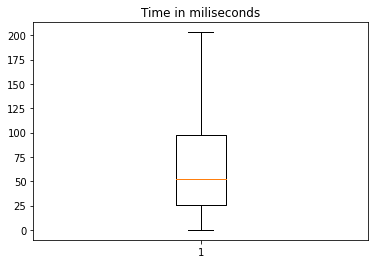

In [9]:
plt.boxplot(np.diff(data.index.values) / 10 ** 6, showfliers=False)
plt.title('Time in miliseconds')
plt.show()

Рассмотрим графики реализованной волатильности для данных инструментов:

In [59]:
def volatility(ts, frame, shift):
    result_ts = []
    data = np.log(ts).diff(shift)
    start_index = data.index[0]
    delta_index = datetime.timedelta(seconds=frame)
    while start_index +  2 * delta_index < data.index[-1]:
        try:
            curr_data = data[(data.index < start_index + delta_index) & (data.index > start_index)]
            value = np.sqrt(curr_data.sum())
            if value:
                result_ts.append([curr_data.index[-1], np.sqrt(curr_data.sum())])
            start_index += delta_index
        except:
            start_index += delta_index
    return result_ts

### Frames

In [83]:
y1 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 1, 1)
y5 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 5, 1)
y10 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 10, 1)
y20 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 20, 1)
y50 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 50, 1)
y100 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 100, 1)

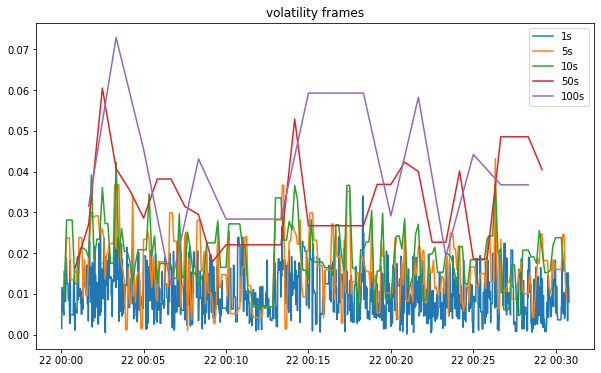

In [82]:
plt.figure(figsize = (10, 6))
plt.plot(pd.Series(index= np.array(y1)[:, 0], data= np.array(y1)[:, 1]).ffill())
plt.plot(pd.Series(index= np.array(y5)[:, 0], data= np.array(y5)[:, 1]).ffill())
plt.plot(pd.Series(index= np.array(y10)[:, 0], data= np.array(y10)[:, 1]).ffill())
plt.plot(pd.Series(index= np.array(y50)[:, 0], data= np.array(y50)[:, 1]).ffill())
plt.plot(pd.Series(index= np.array(y100)[:, 0], data= np.array(y100)[:, 1]).ffill())
plt.legend(['1s', '5s', '10s', '50s', '100s'])
plt.title('volatility frames')
plt.show()

### Shifts

In [84]:
y1 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 5, 1)
y5 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 5, 5)
y10 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 5, 10)
y20 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 5, 20)
y50 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 5, 50)
y100 = volatility(data['ETHUSDT||Binance.london'][data.index < '2021-10-22 00:30:49.975690'], 5, 100)

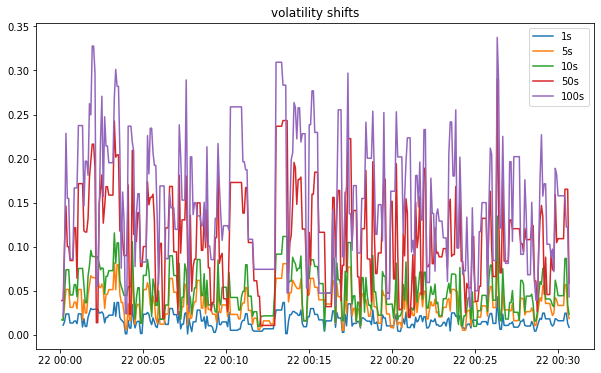

In [85]:
plt.figure(figsize = (10, 6))
plt.plot(pd.Series(index= np.array(y1)[:, 0], data= np.array(y1)[:, 1]).ffill())
plt.plot(pd.Series(index= np.array(y5)[:, 0], data= np.array(y5)[:, 1]).ffill())
plt.plot(pd.Series(index= np.array(y10)[:, 0], data= np.array(y10)[:, 1]).ffill())
plt.plot(pd.Series(index= np.array(y50)[:, 0], data= np.array(y50)[:, 1]).ffill())
plt.plot(pd.Series(index= np.array(y100)[:, 0], data= np.array(y100)[:, 1]).ffill())
plt.legend(['1s', '5s', '10s', '50s', '100s'])
plt.title('volatility shifts')
plt.show()

Расмотрим как меняется волатильность для разных инструментов.

frame = 5, shift = 10

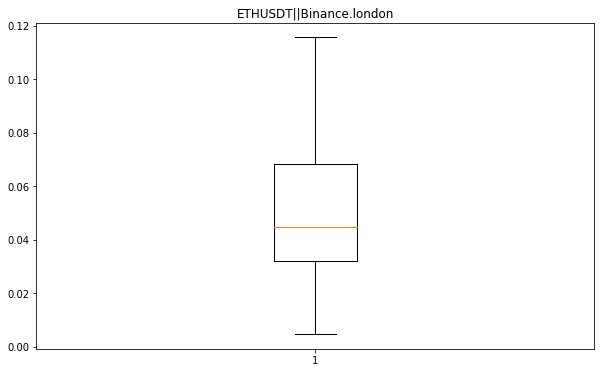

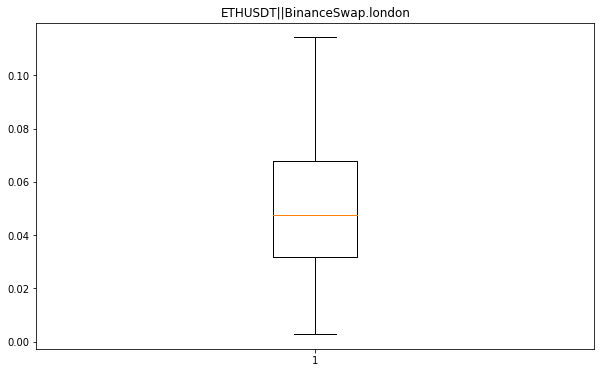

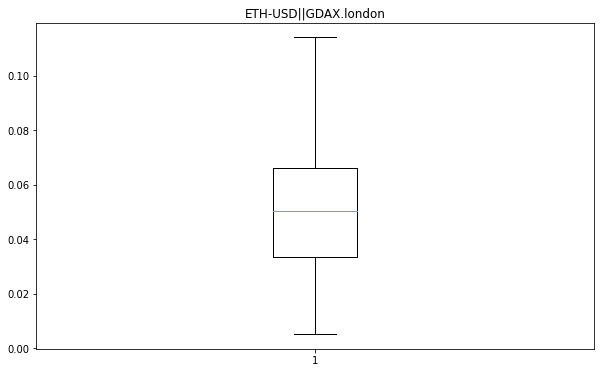

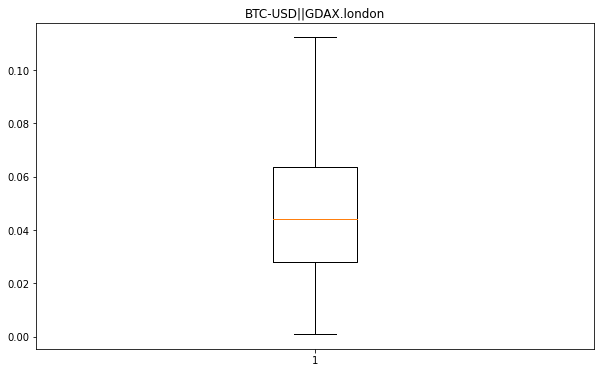

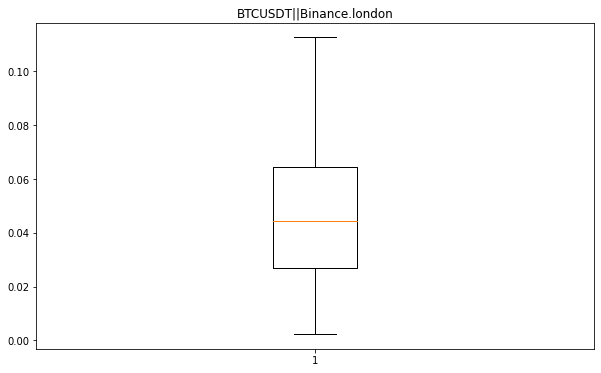

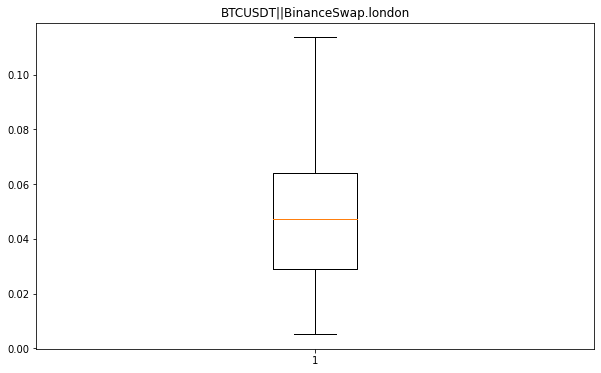

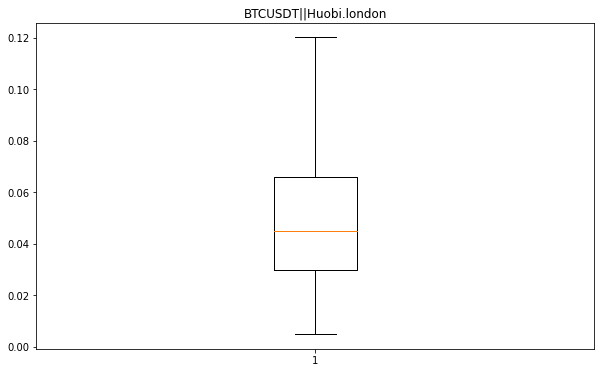

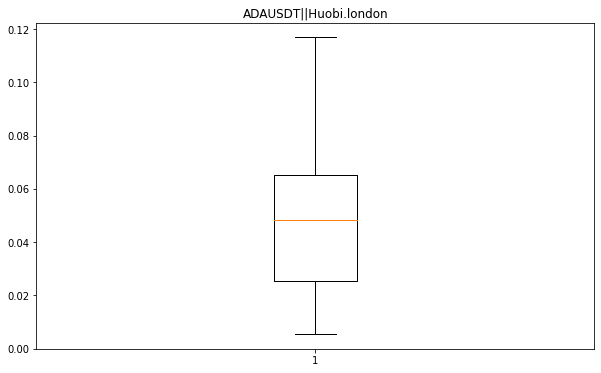

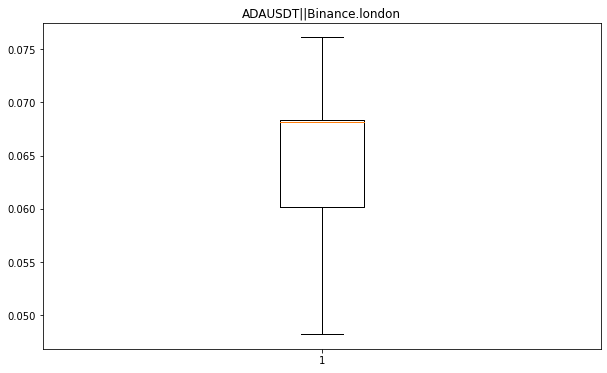

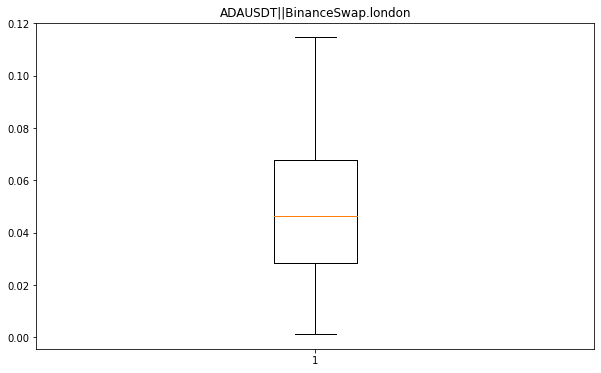

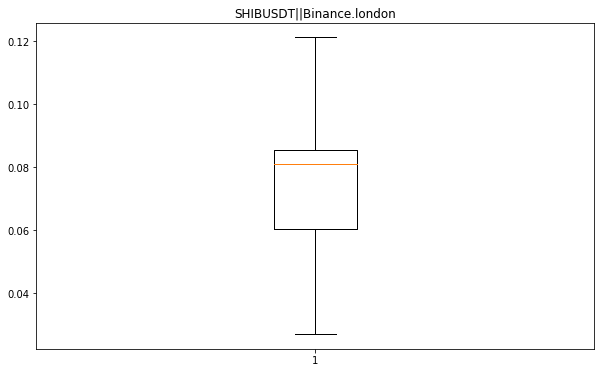

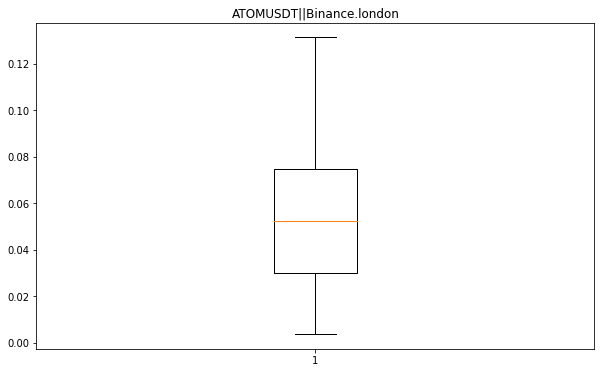

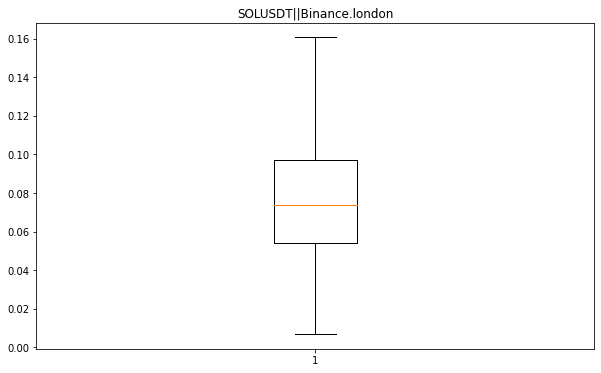

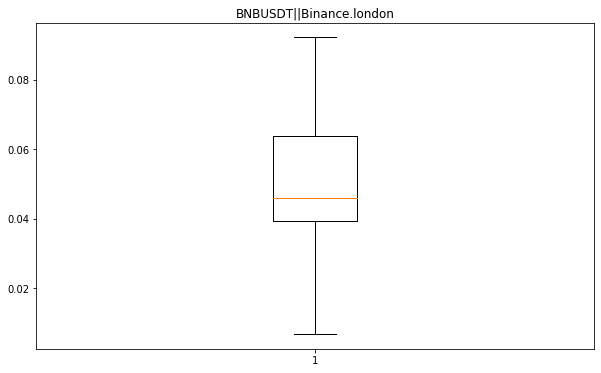

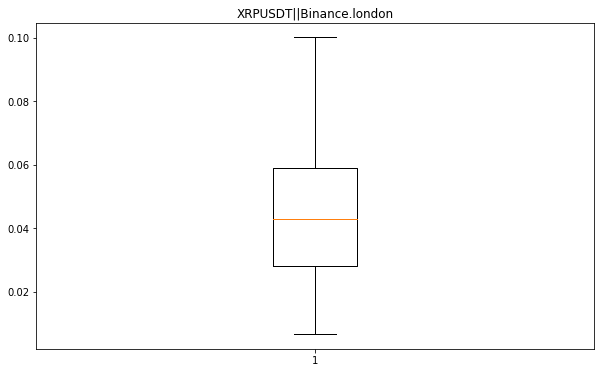

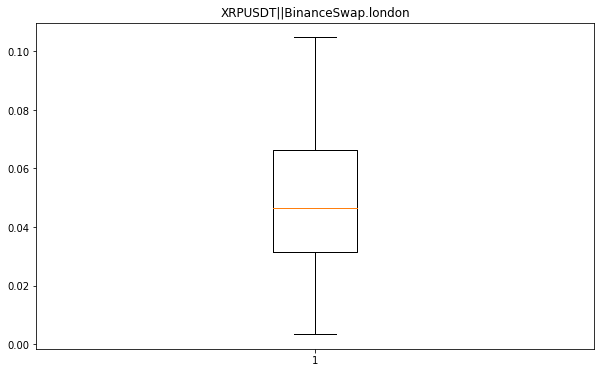

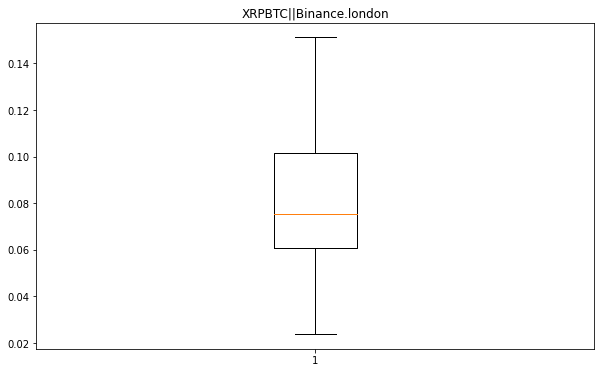

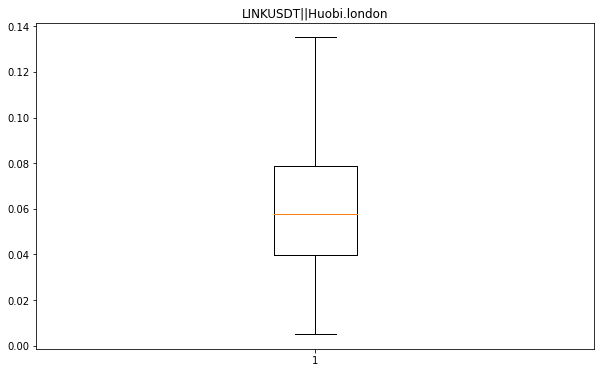

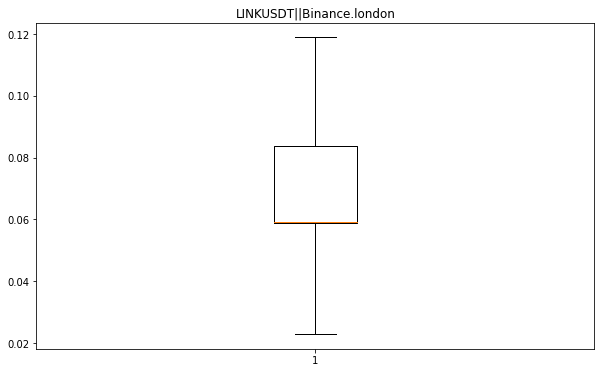

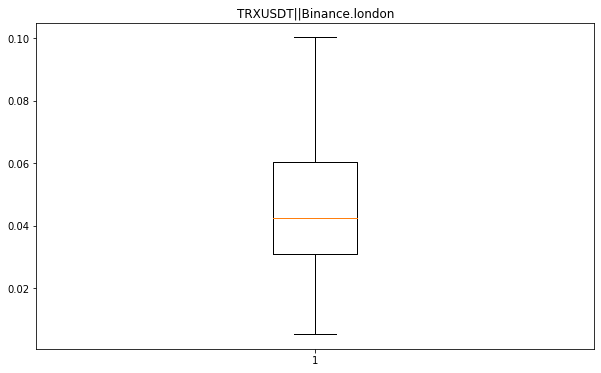

In [107]:
for instr in data.columns:
    y10 = volatility(data[instr][data.index < '2021-10-22 00:30:49.975690'], 5, 10)
    plt.figure(figsize=(10, 6))
    plt.boxplot(pd.Series(index= np.array(y10)[:, 0], data= np.array(y10)[:, 1]).ffill().dropna(), showfliers=False)
    plt.title(instr)
plt.show()

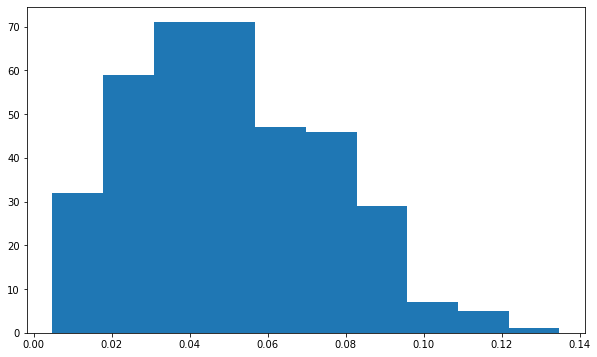

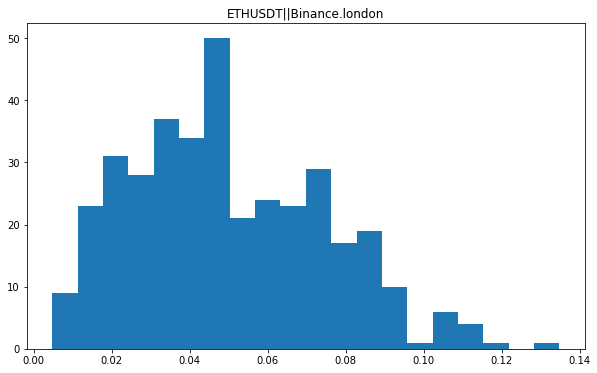

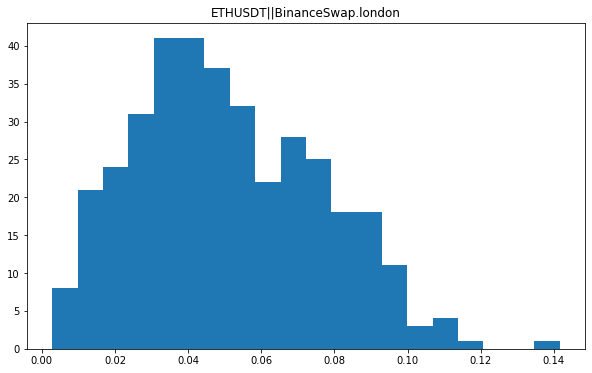

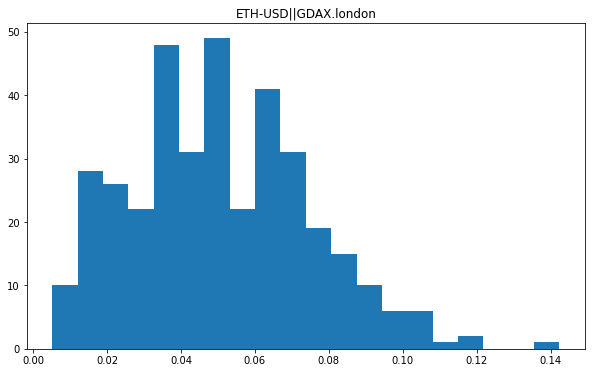

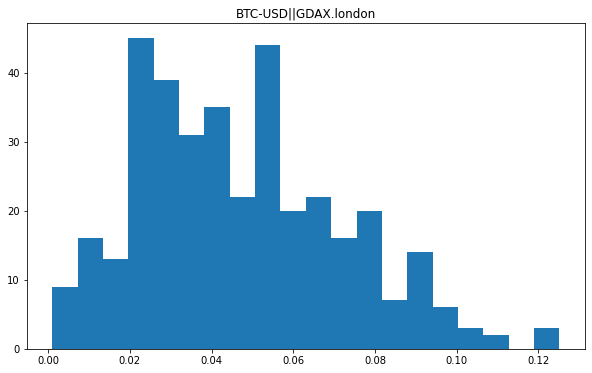

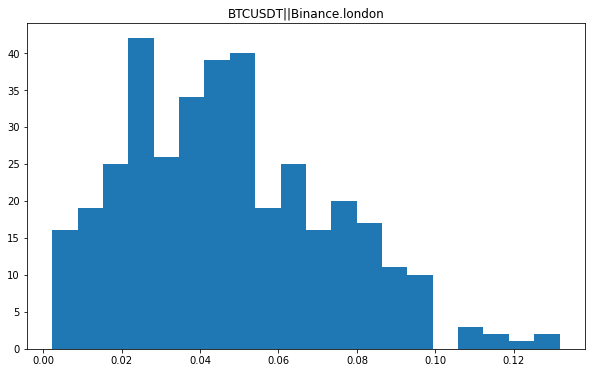

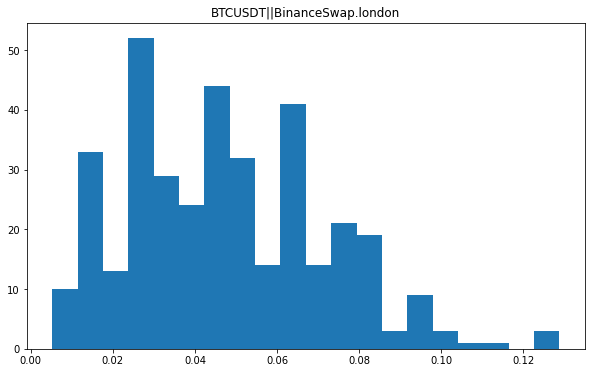

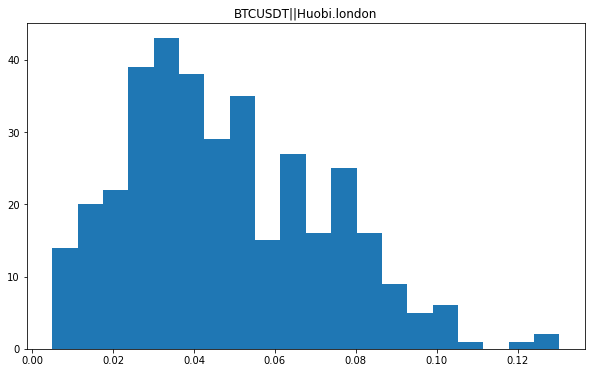

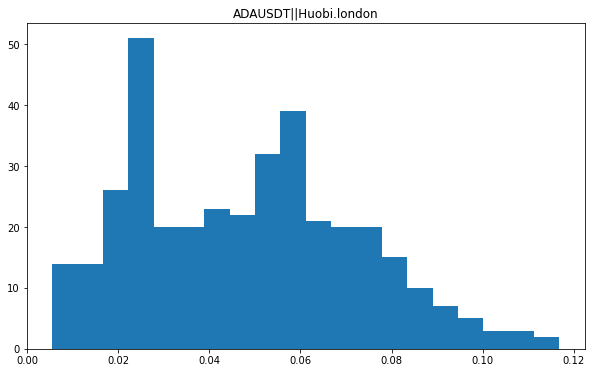

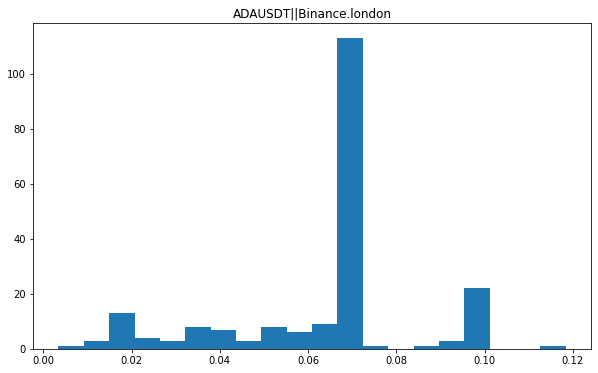

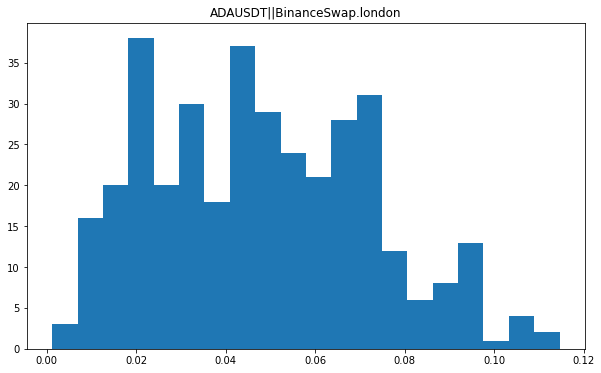

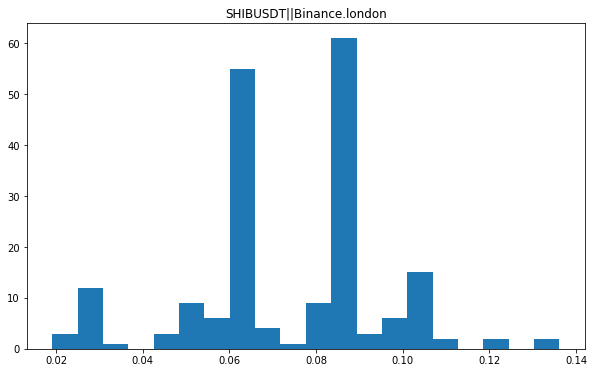

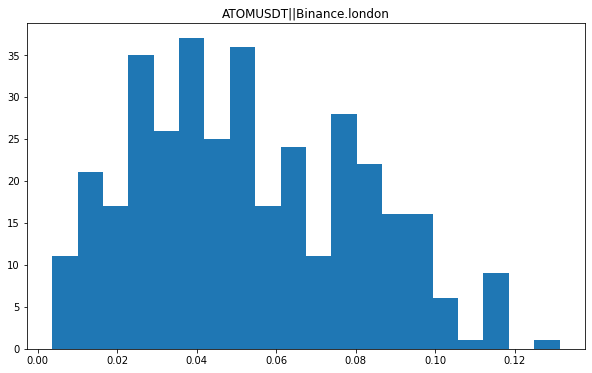

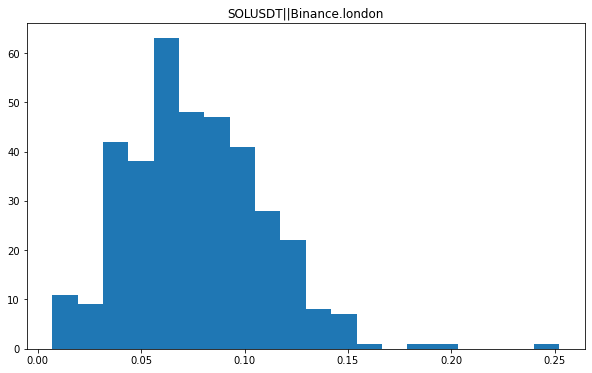

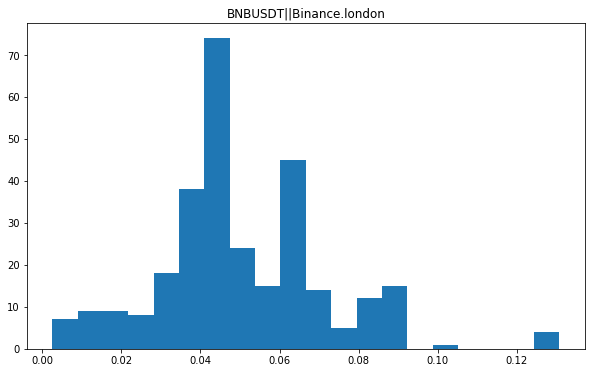

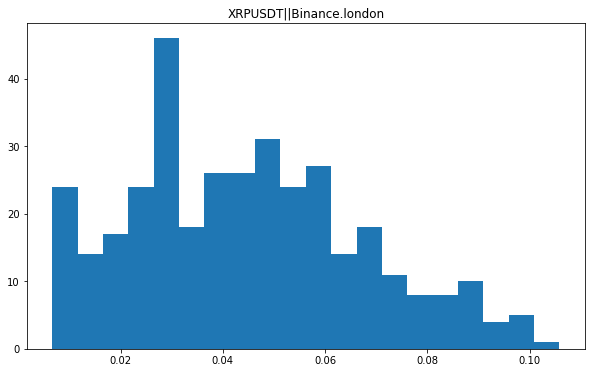

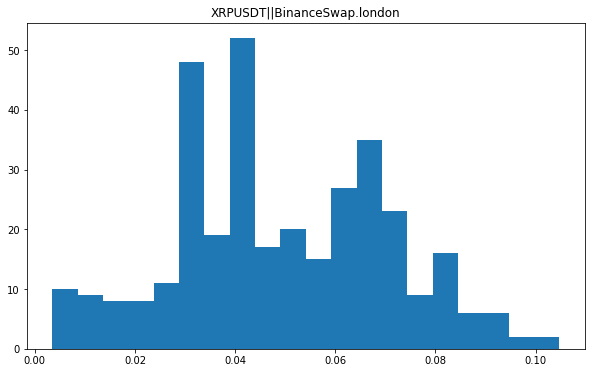

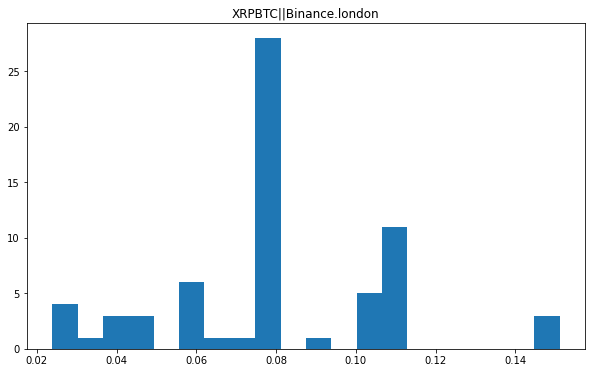

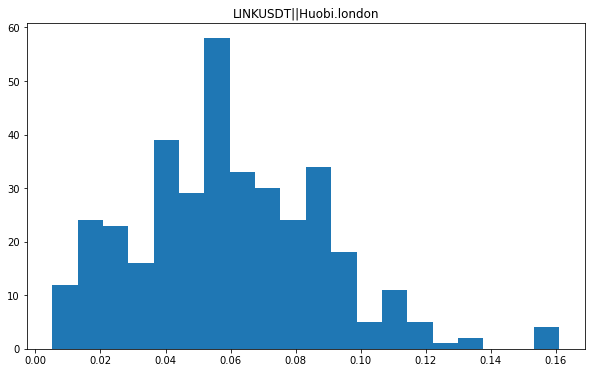

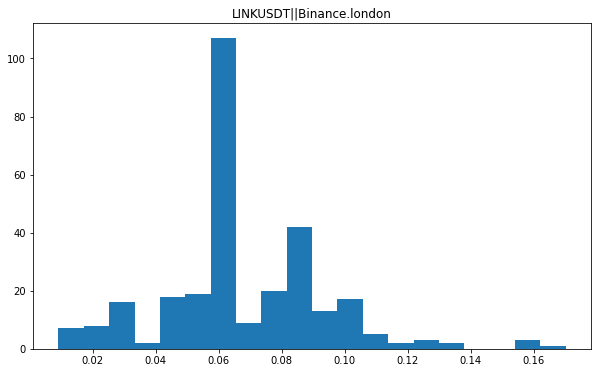

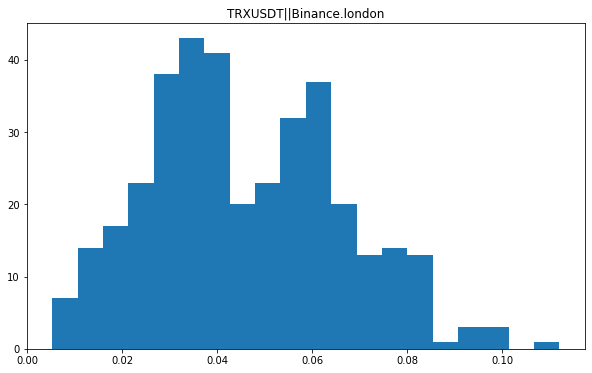

In [98]:
for instr in data.columns:
    y10 = volatility(data[instr][data.index < '2021-10-22 00:30:49.975690'], 5, 10)
    plt.figure(figsize=(10, 6))
    plt.hist(pd.Series(index= np.array(y10)[:, 0], data= np.array(y10)[:, 1]).ffill(), bins=20)
    plt.title(instr)
plt.show()

frame = 5, shift=1

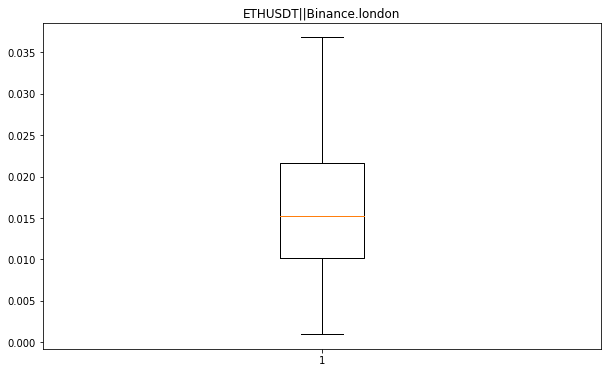

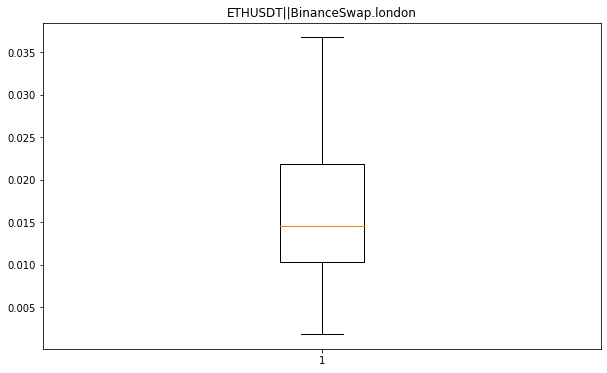

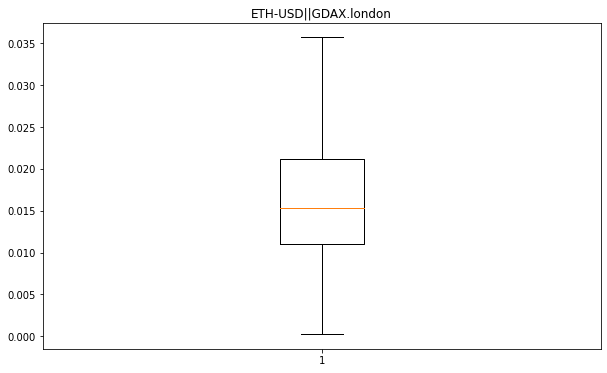

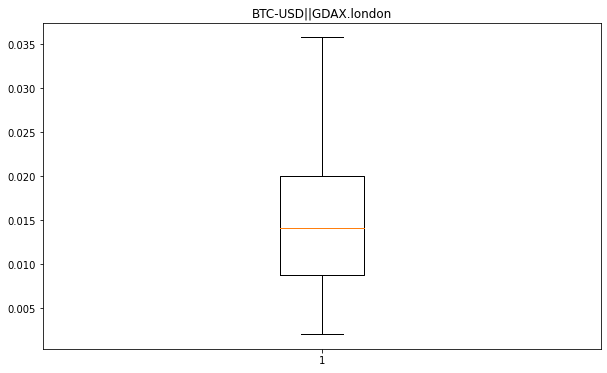

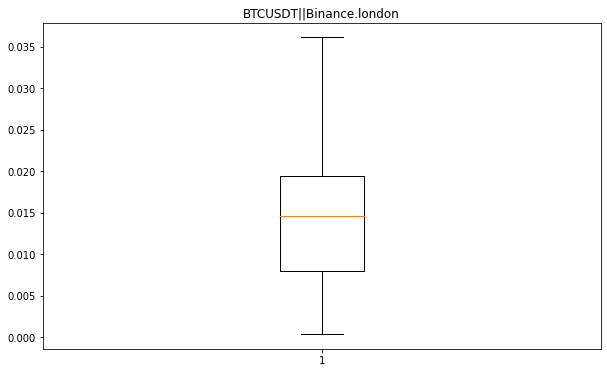

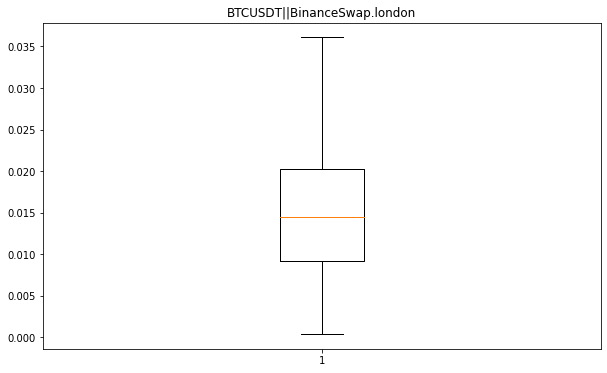

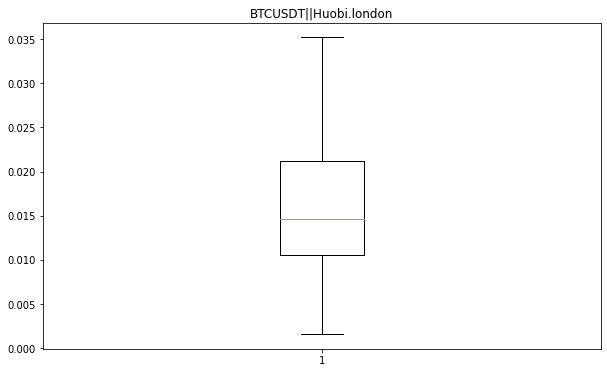

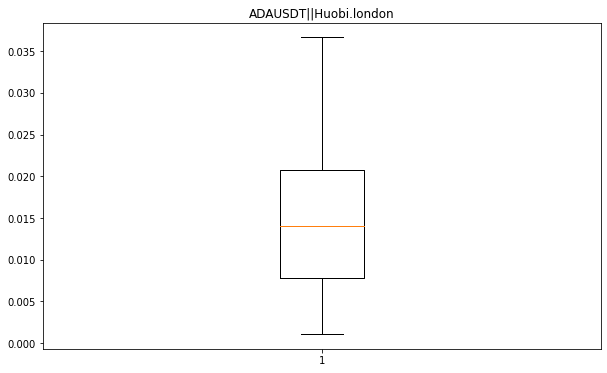

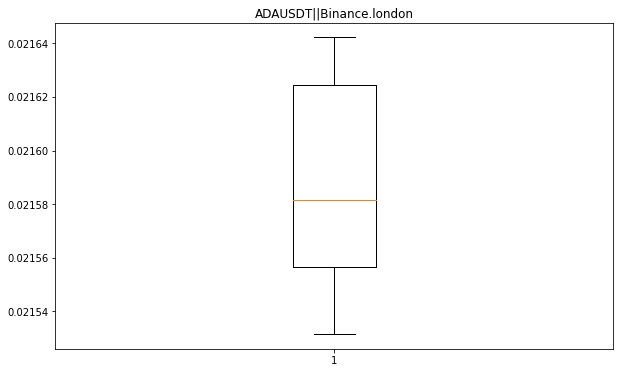

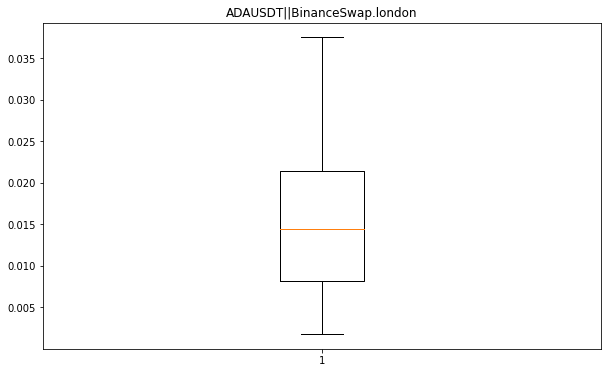

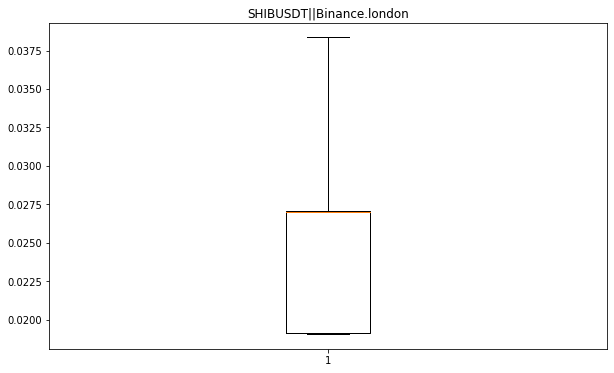

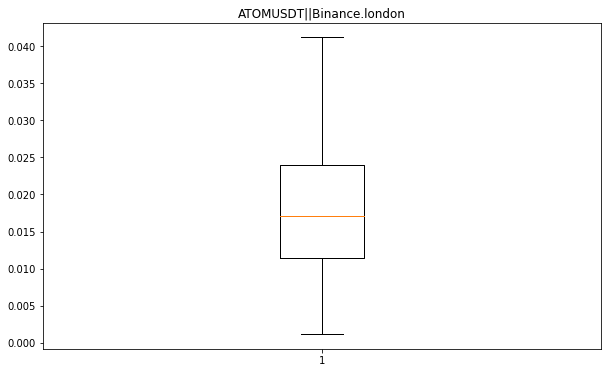

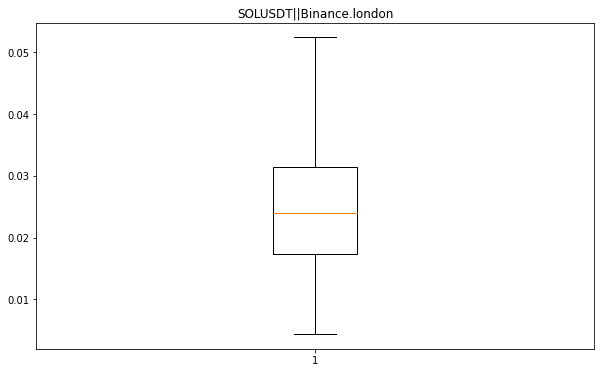

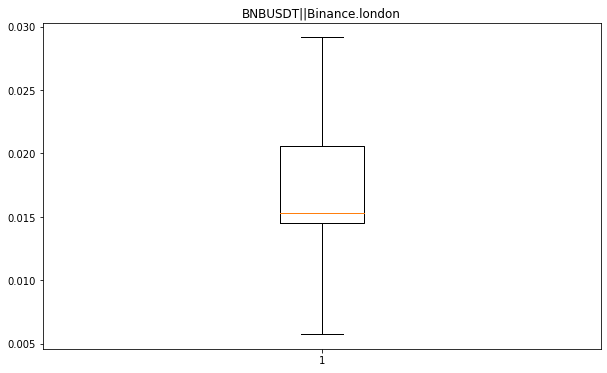

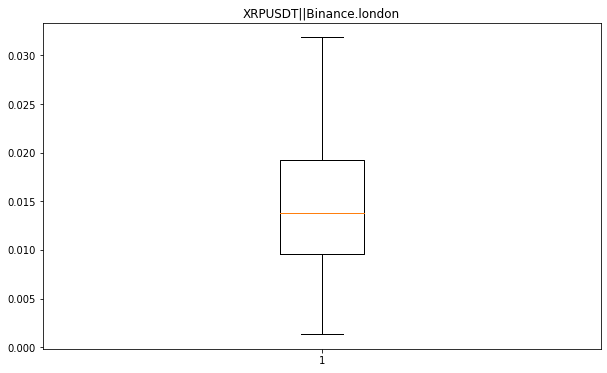

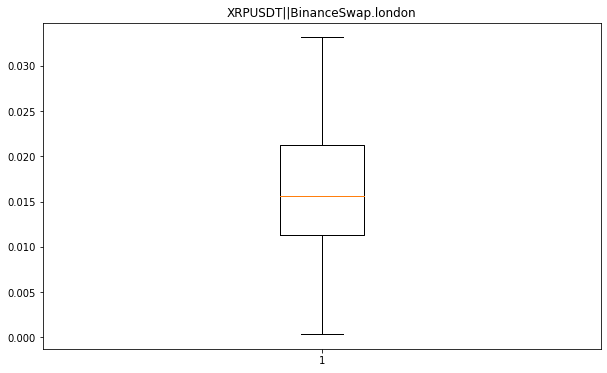

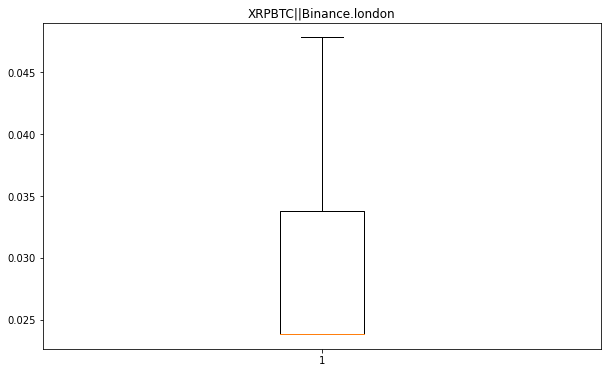

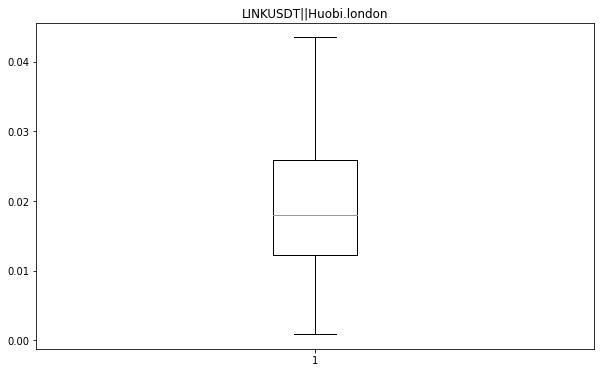

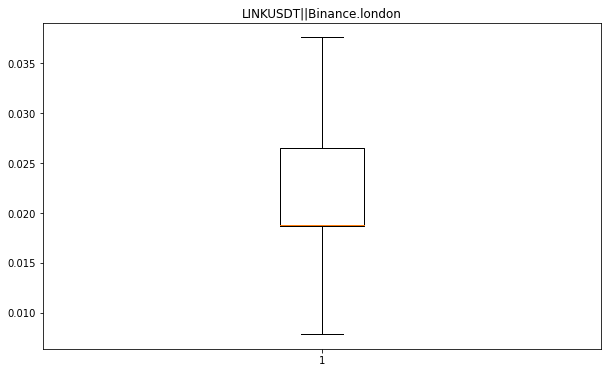

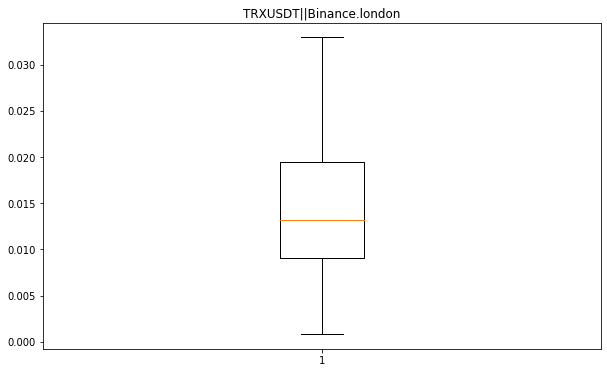

In [106]:
for instr in data.columns:
    y10 = volatility(data[instr][data.index < '2021-10-22 00:30:49.975690'], 5, 1)
    plt.figure(figsize=(10, 6))
    plt.boxplot(pd.Series(index= np.array(y10)[:, 0], data= np.array(y10)[:, 1]).ffill().dropna(), showfliers=False)
    plt.title(instr)
plt.show()

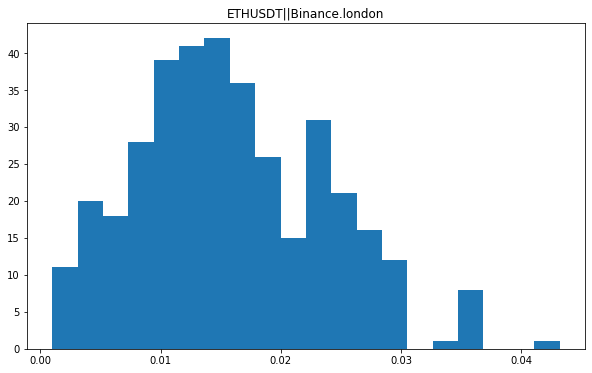

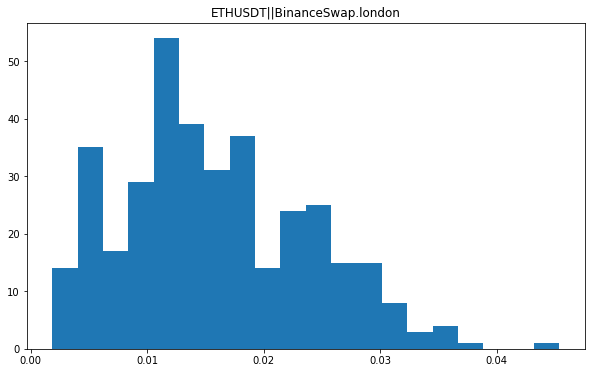

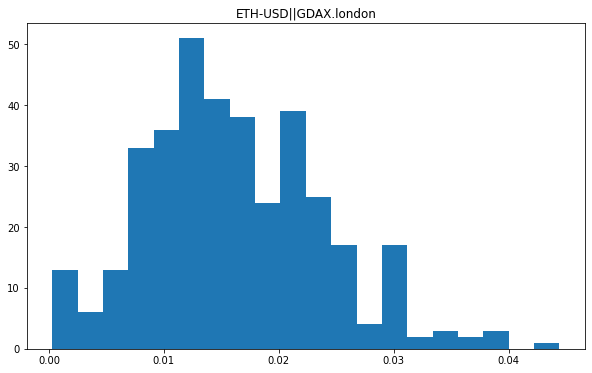

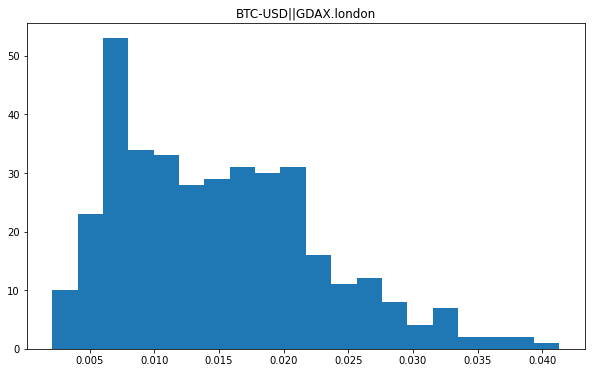

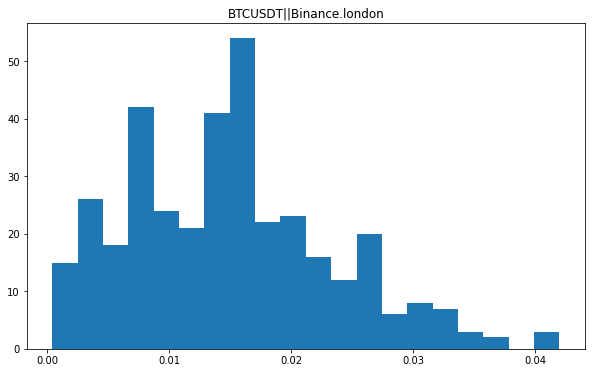

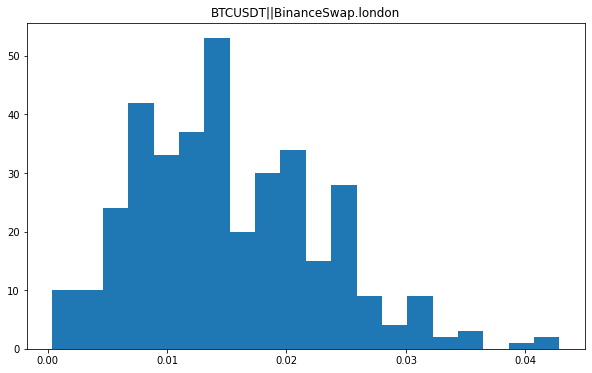

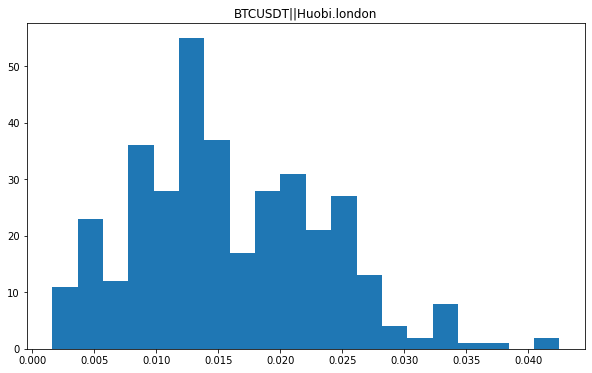

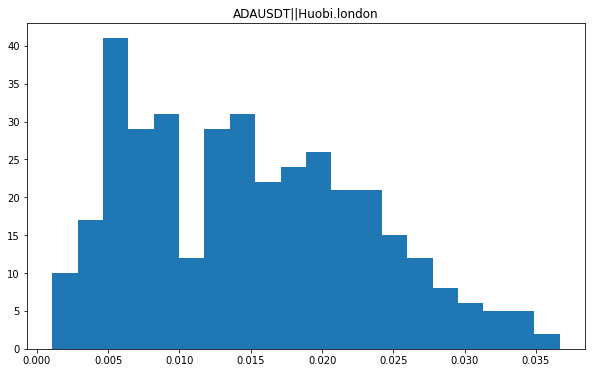

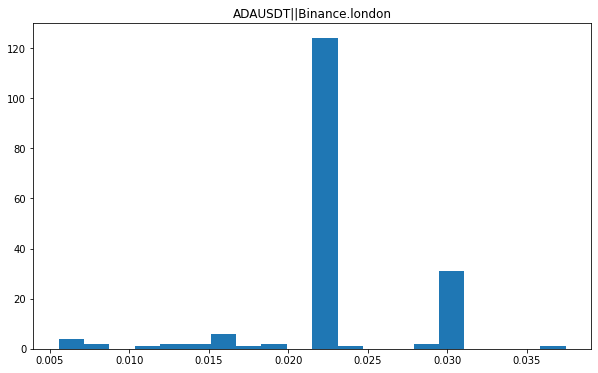

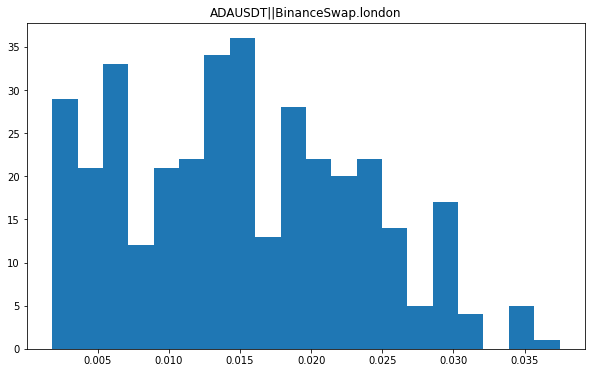

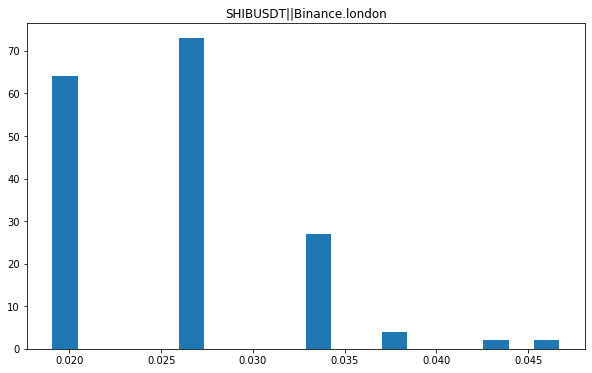

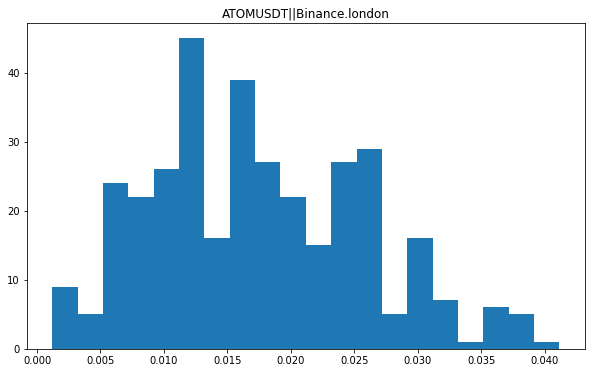

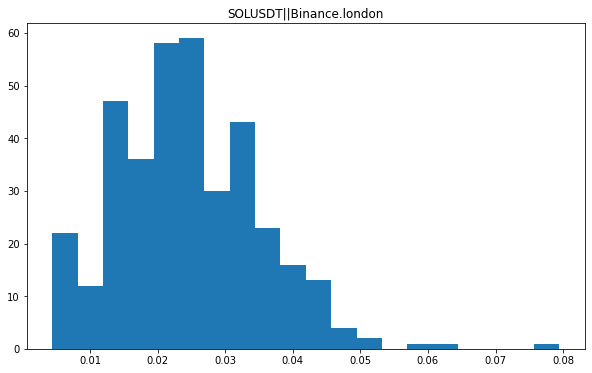

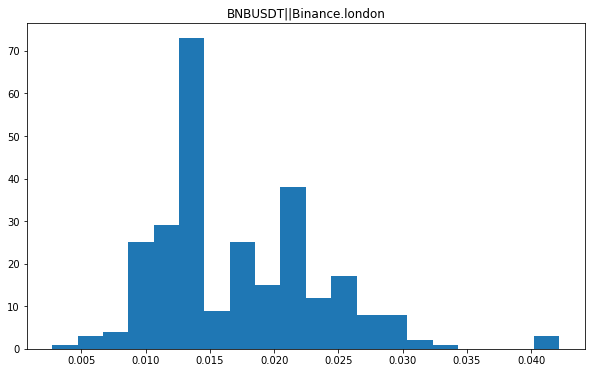

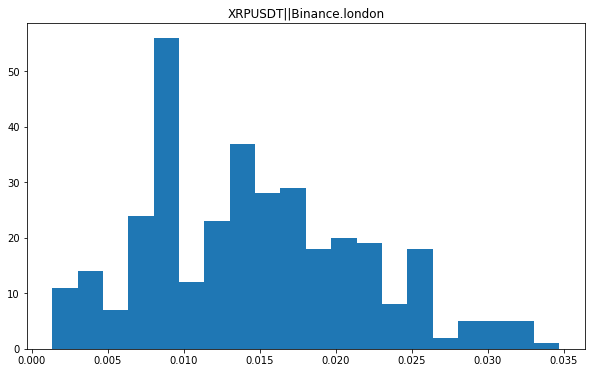

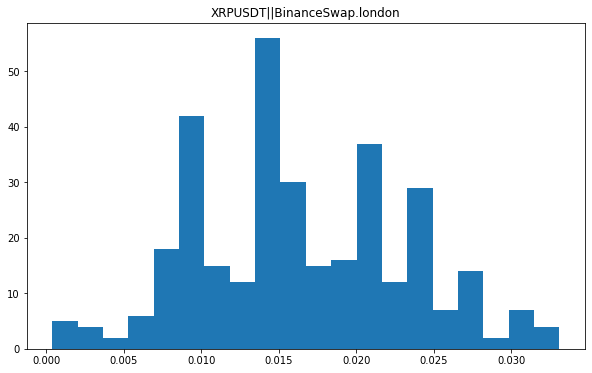

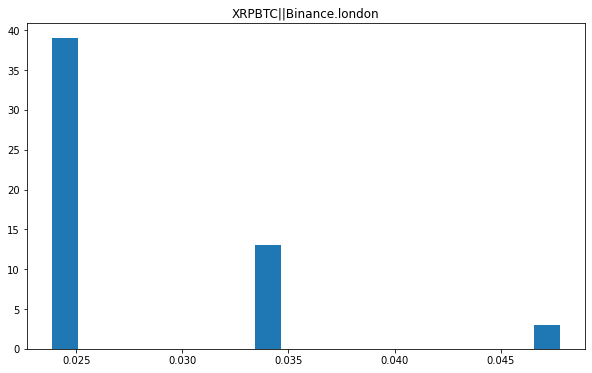

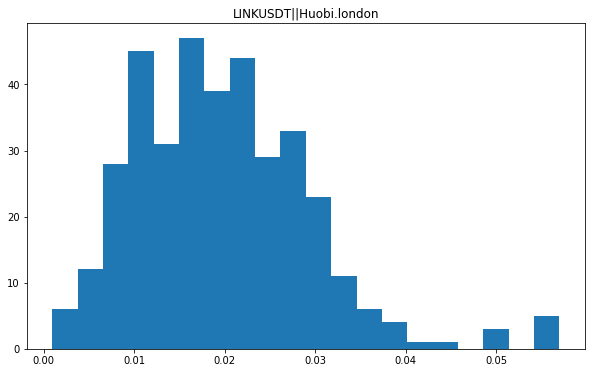

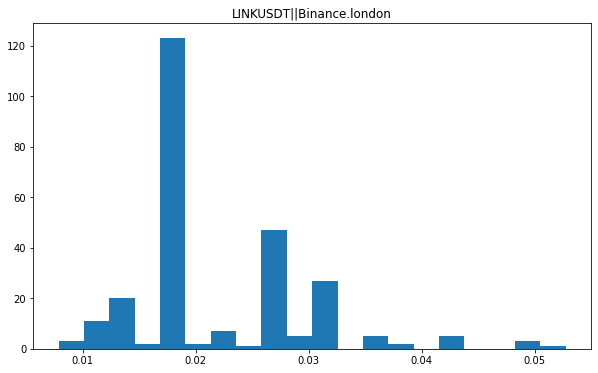

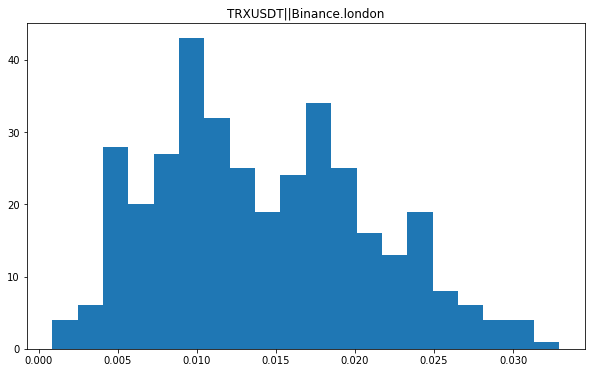

In [100]:
for instr in data.columns:
    y10 = volatility(data[instr][data.index < '2021-10-22 00:30:49.975690'], 5, 1)
    plt.figure(figsize=(10, 6))
    plt.hist(pd.Series(index= np.array(y10)[:, 0], data= np.array(y10)[:, 1]).ffill(), bins=20)
    plt.title(instr)
plt.show()

frame=100, shift=1

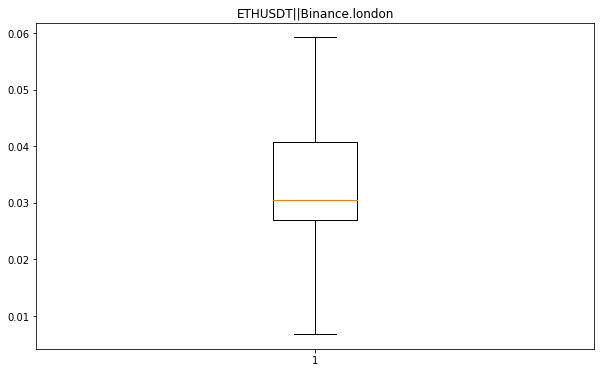

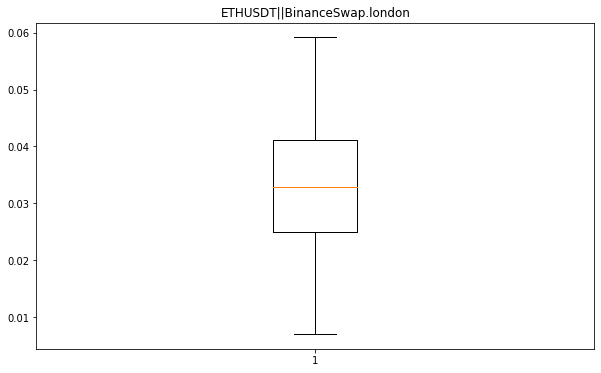

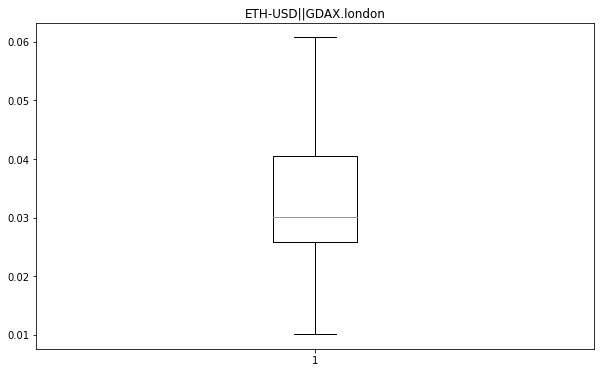

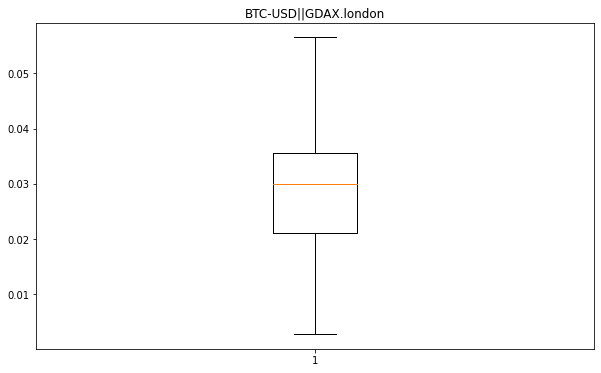

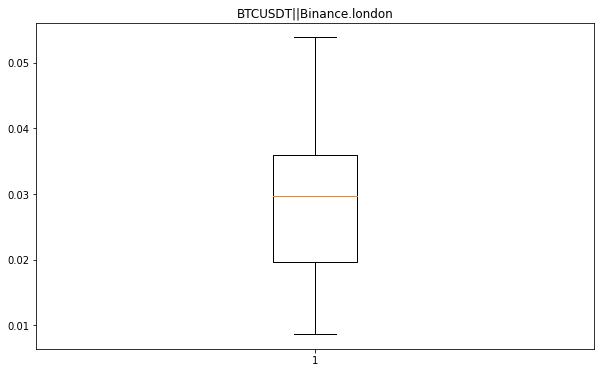

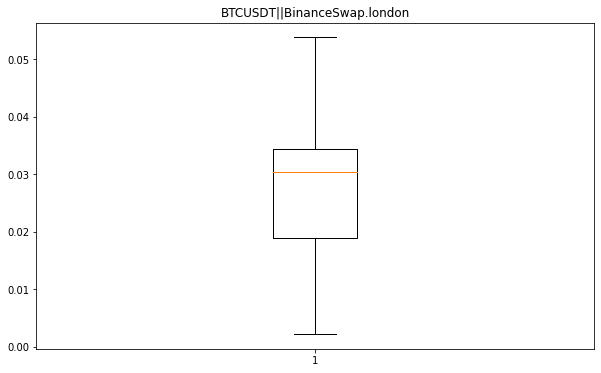

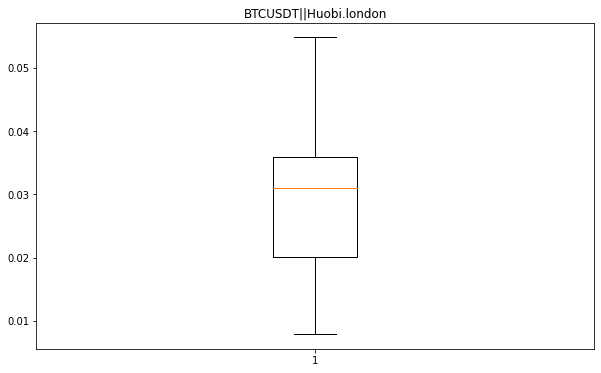

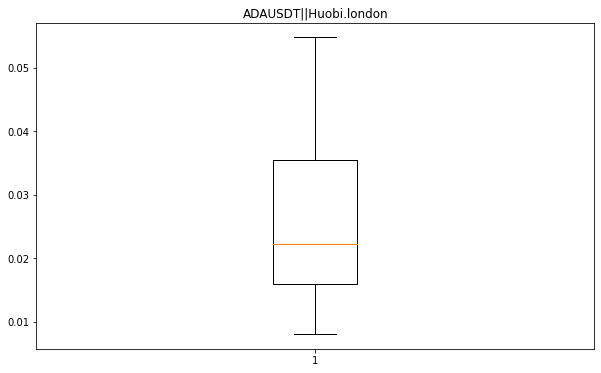

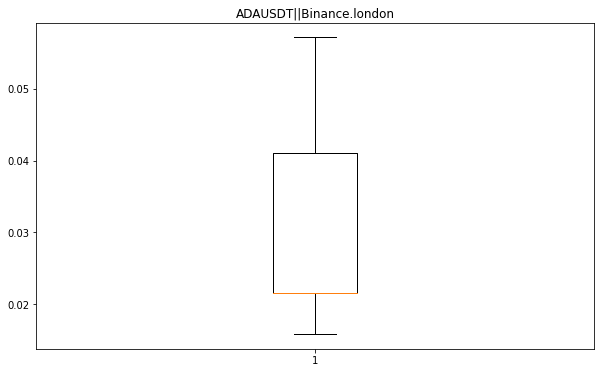

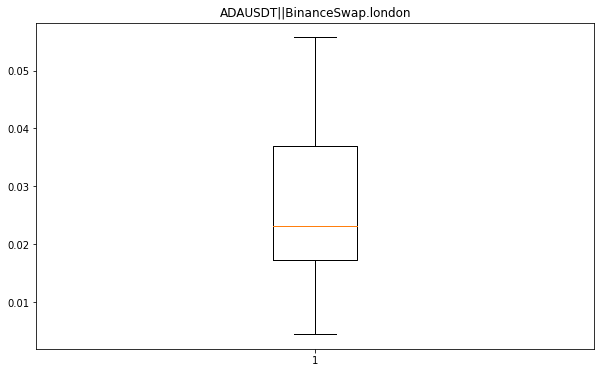

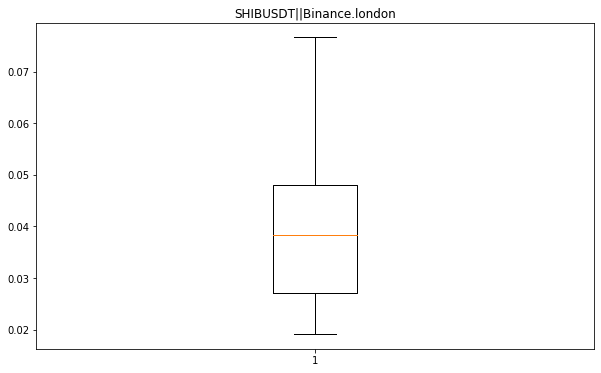

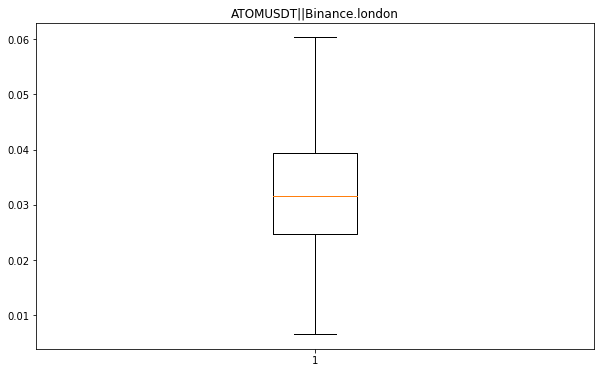

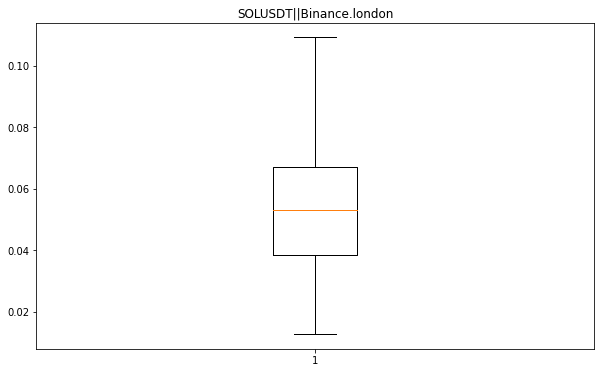

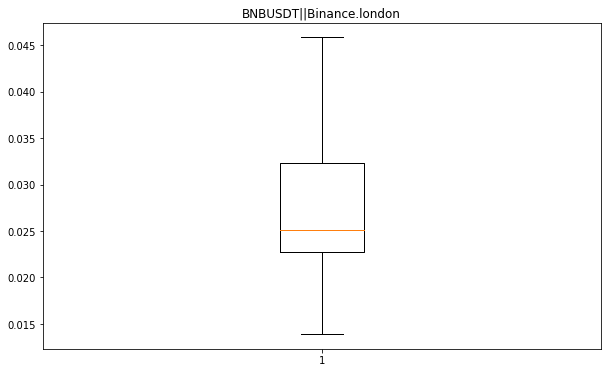

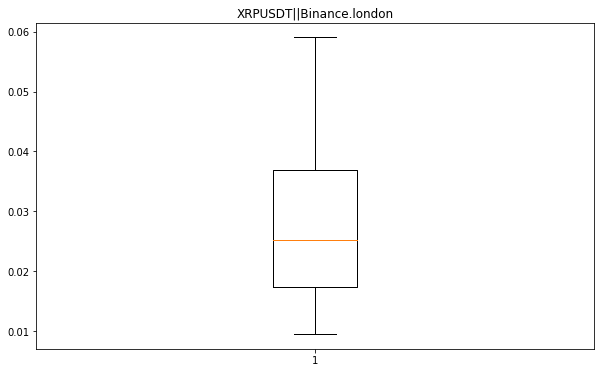

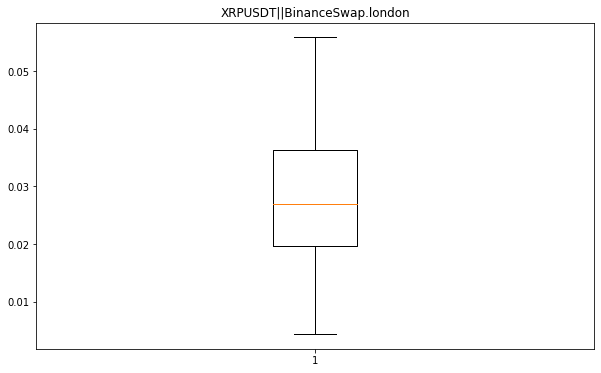

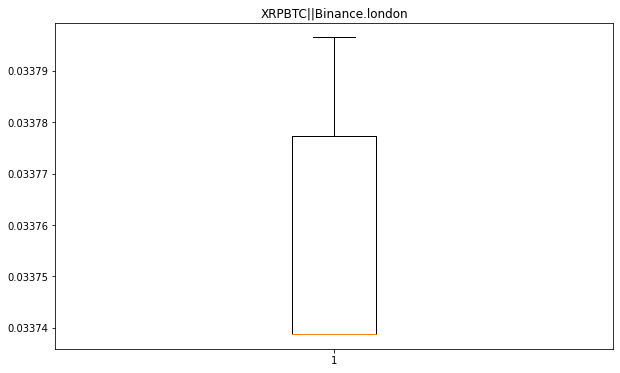

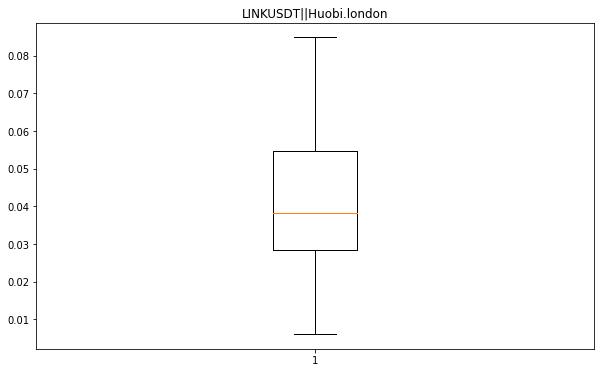

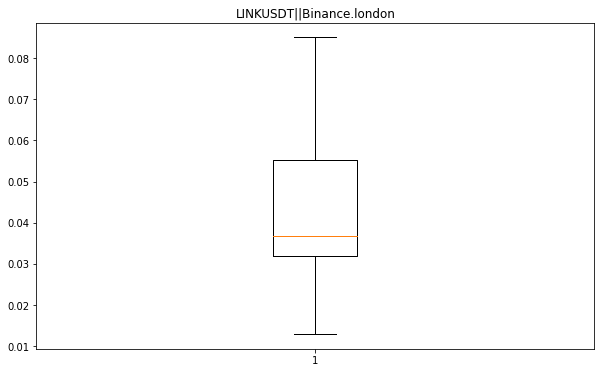

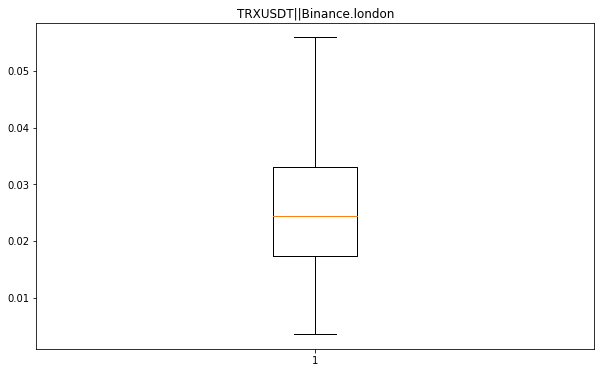

In [105]:
for instr in data.columns:
    y10 = volatility(data[instr][data.index < '2021-10-22 02:30:49.975690'], 100, 1)
    plt.figure(figsize=(10, 6))
    plt.boxplot(pd.Series(index= np.array(y10)[:, 0], data= np.array(y10)[:, 1]).ffill().dropna(), showfliers=False)
    plt.title(instr)
plt.show()

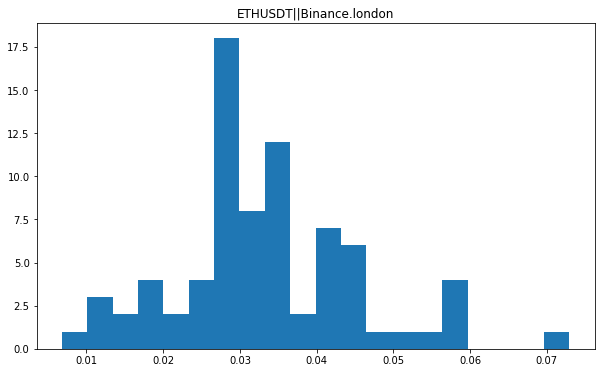

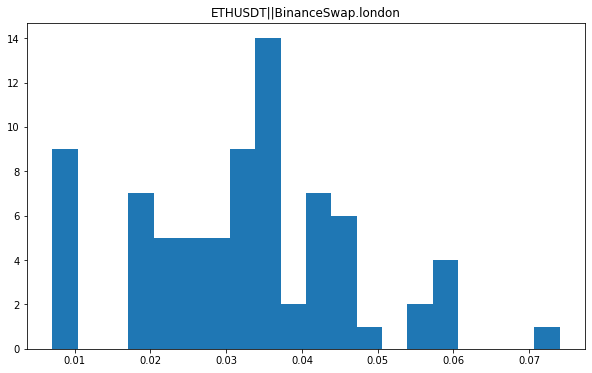

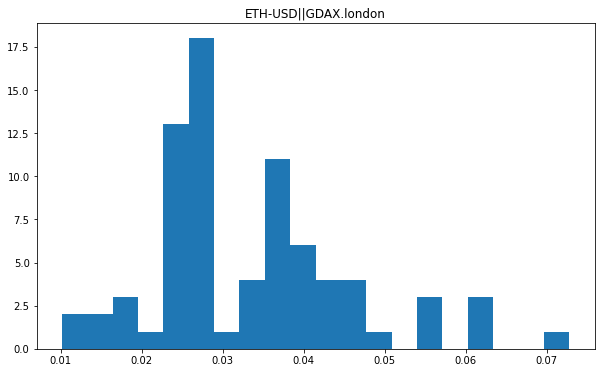

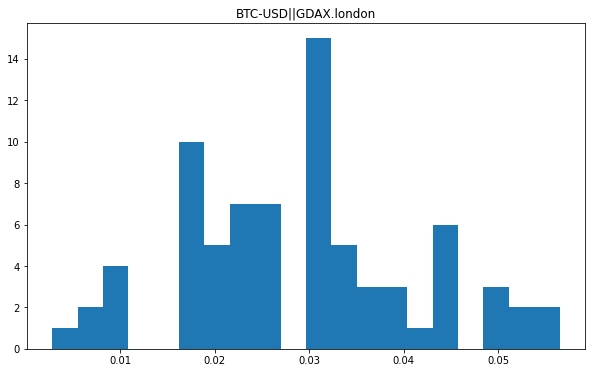

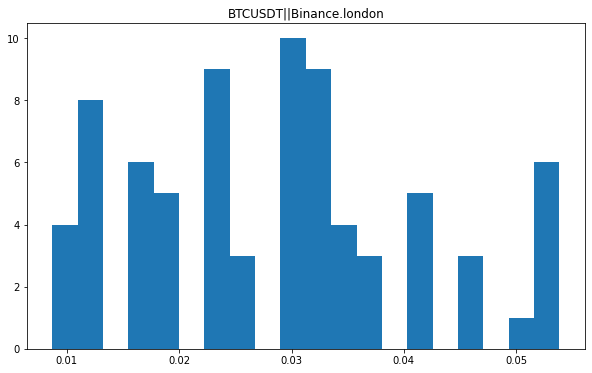

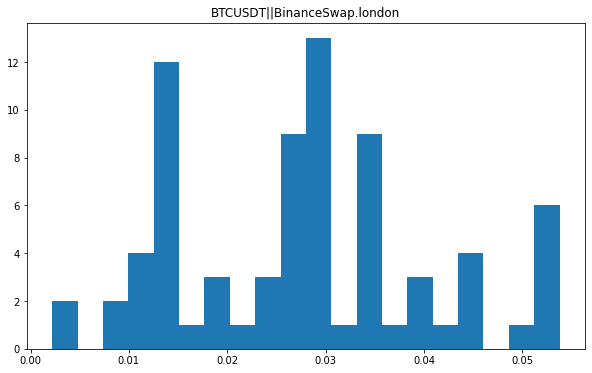

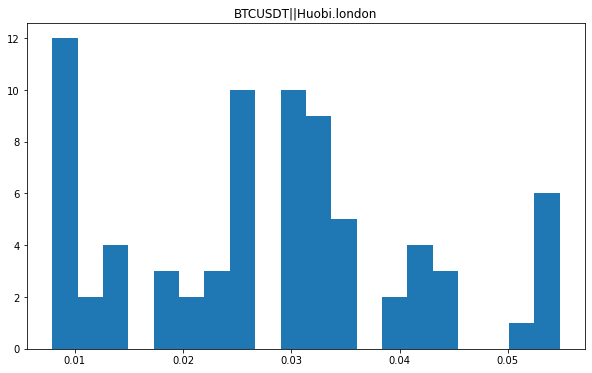

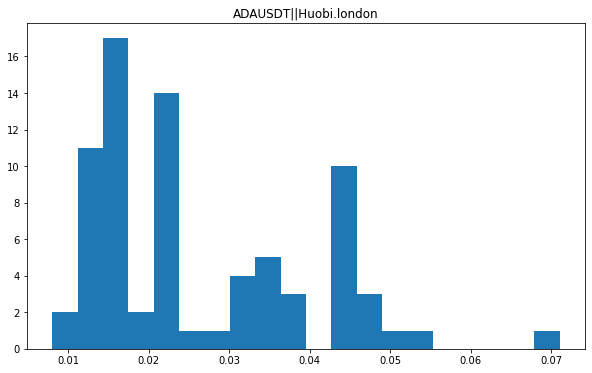

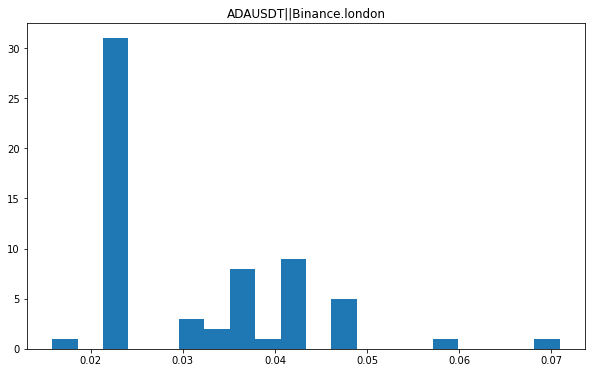

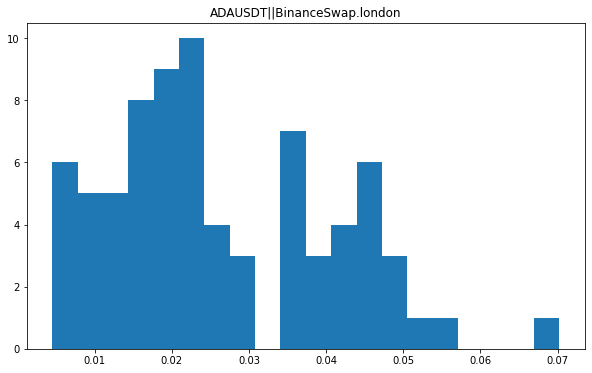

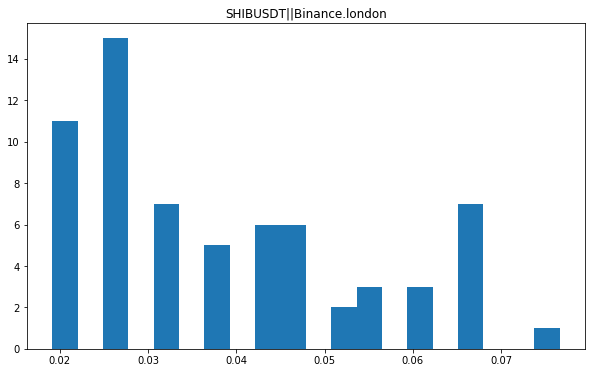

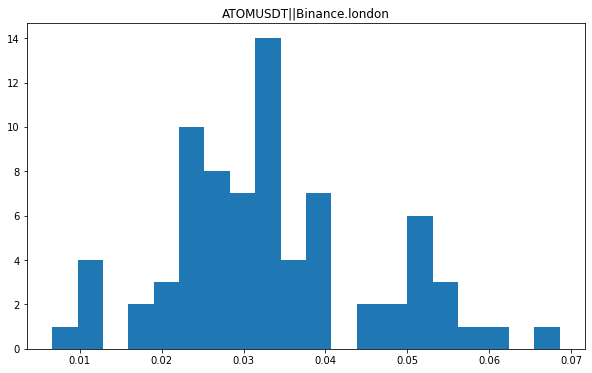

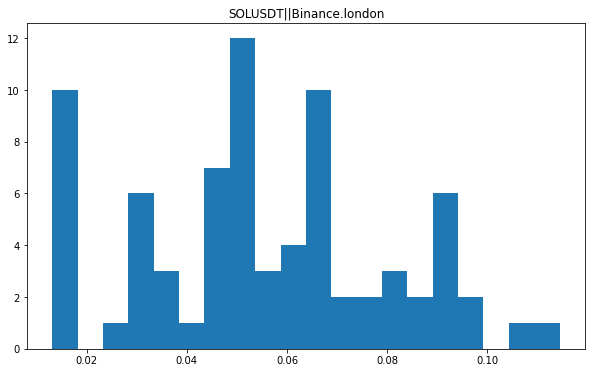

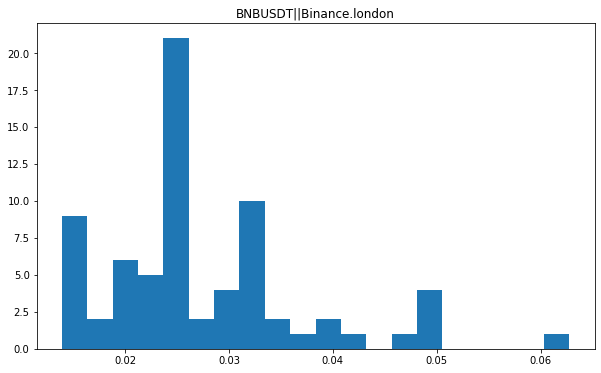

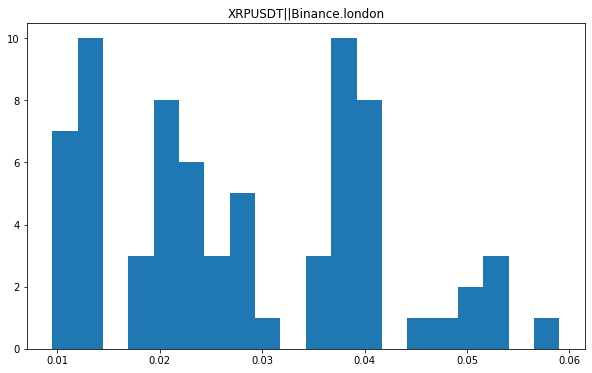

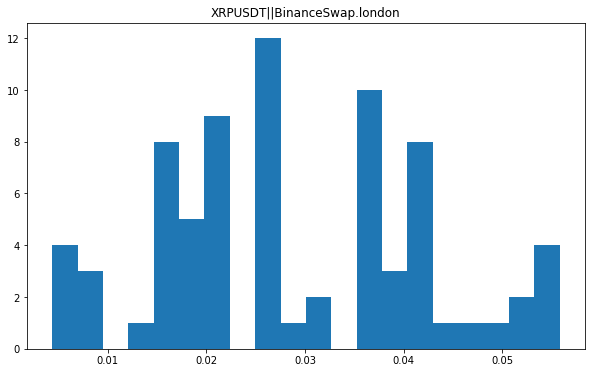

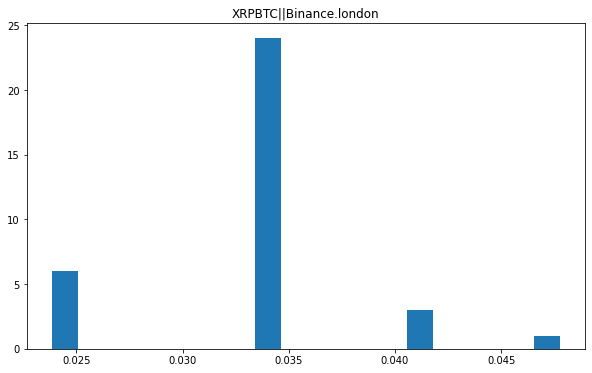

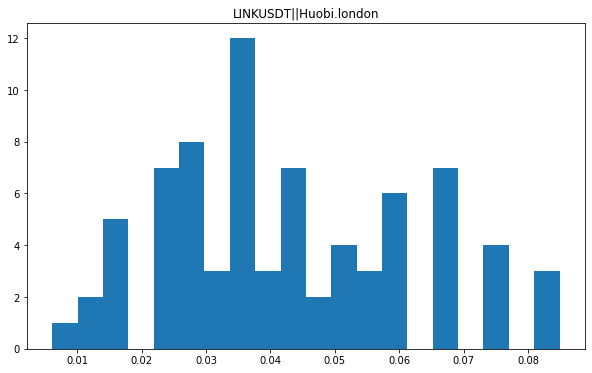

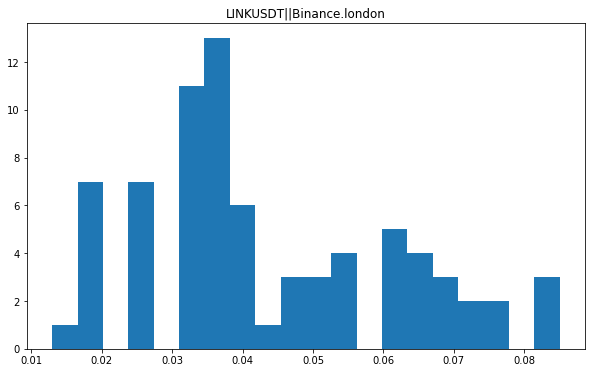

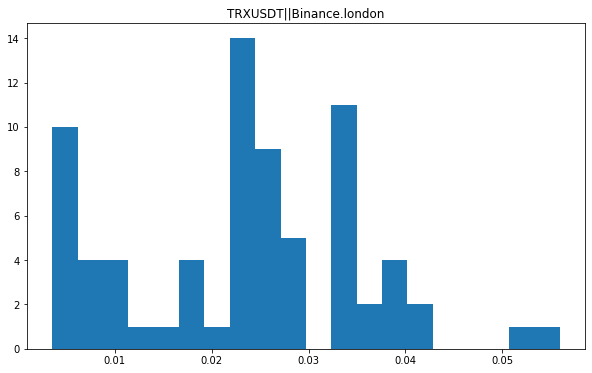

In [103]:
for instr in data.columns:
    y10 = volatility(data[instr][data.index < '2021-10-22 02:10:49.975690'], 100, 1)
    plt.figure(figsize=(10, 6))
    plt.hist(pd.Series(index= np.array(y10)[:, 0], data= np.array(y10)[:, 1]).ffill(), bins=20)
    plt.title(instr)
plt.show()

Можно сделать следующие выводы:

 - для разных иструментов распределения волатильности схожи при одинаковых параметрах
 - следует рассматривать shifts > 5, так как картина для них более информативна
 - с увеличением парметров shifts и frame распределение волатильности становится более походим на нормальное